# 1. Importing all required libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


 # 2. Loading Dataset

In [50]:
import pandas as pd

# Assuming the file is in the same directory as your Jupyter Notebook or script
file_path = '15_years_stock_NIFTY_Dataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [51]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3700,2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700.0
3701,2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300.0
3702,2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900.0
3703,2022-12-29,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100.0
3704,2022-12-30,18259.099609,18265.250000,18080.300781,18105.300781,18105.300781,192000.0


# 3.Exploaratory Data Analysis

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3705 non-null   object 
 1   Open       3675 non-null   float64
 2   High       3675 non-null   float64
 3   Low        3675 non-null   float64
 4   Close      3675 non-null   float64
 5   Adj Close  3675 non-null   float64
 6   Volume     3675 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.7+ KB


In [53]:
df.fillna(method='ffill', inplace=True)
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3705 non-null   datetime64[ns]
 1   Open       3705 non-null   float64       
 2   High       3705 non-null   float64       
 3   Low        3705 non-null   float64       
 4   Close      3705 non-null   float64       
 5   Adj Close  3705 non-null   float64       
 6   Volume     3705 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 202.7 KB


In [54]:
dfcopy1 = df.copy()
dfcopy2=df.copy()
dfcopy3=df.copy()

In [55]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,8708.115292,8758.220476,8643.332734,8701.888531,8701.888531,1.974058e+05
std,3976.868831,3987.658048,3958.024484,3974.098655,3974.098655,2.166187e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5436.500000,5477.850098,5393.950195,5431.649902,5431.649902,0.000000e+00
50%,8047.549805,8101.950195,7995.049805,8047.299805,8047.299805,1.616000e+05
75%,10905.299805,10954.950195,10833.349609,10891.599609,10891.599609,2.741000e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


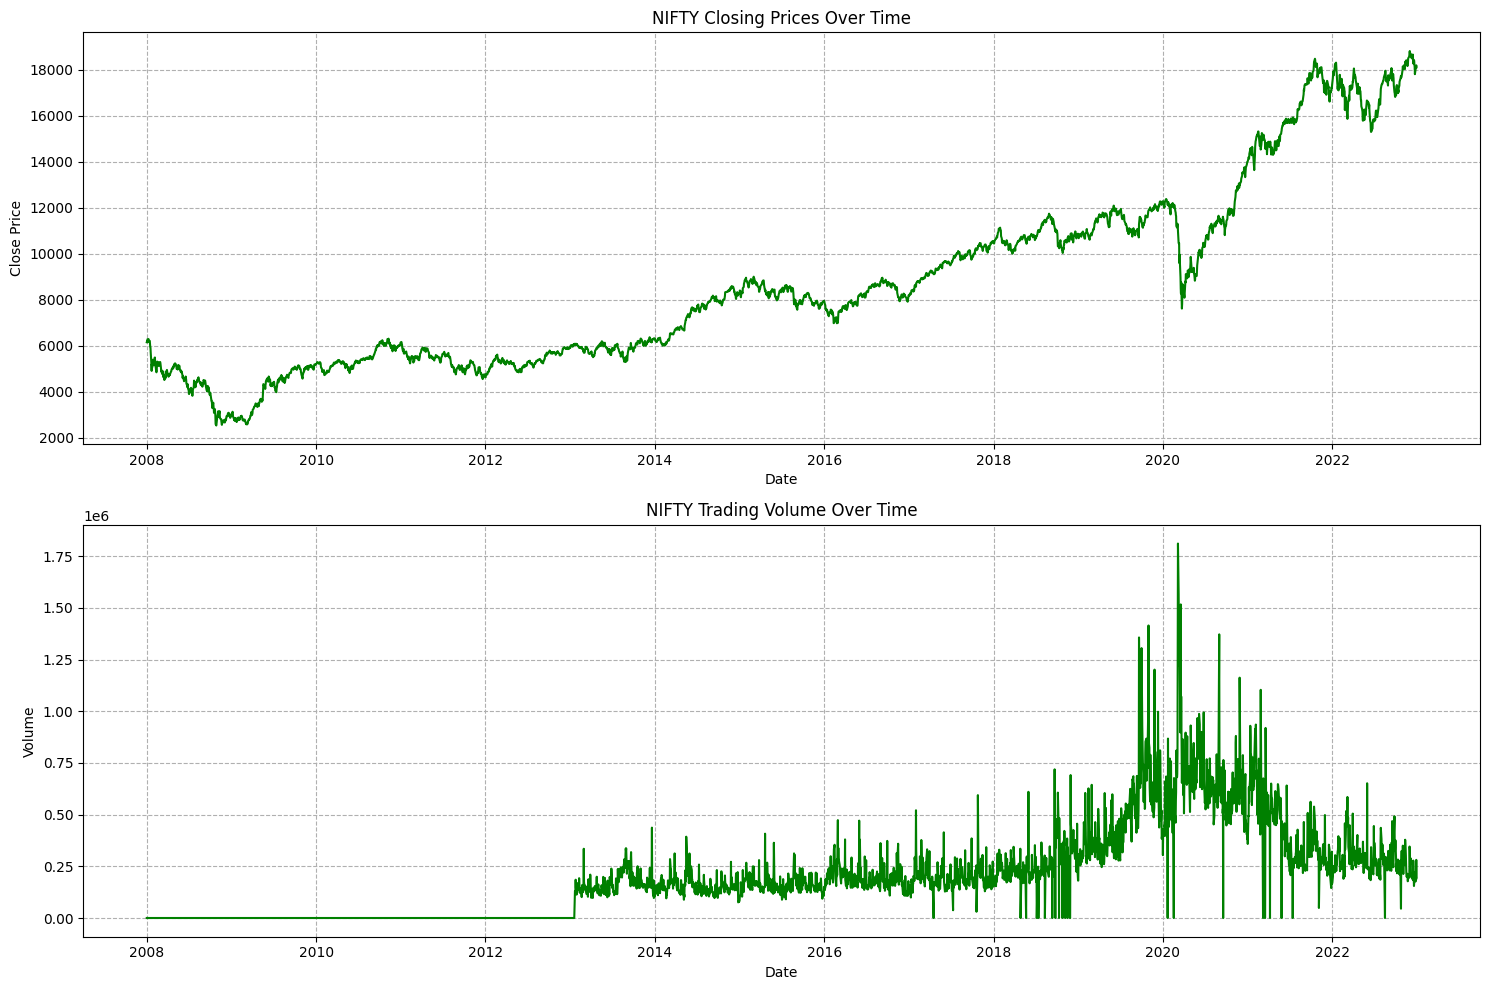

In [56]:
plt.figure(figsize=(15,10))
# Plot the 'Close' price
plt.subplot(2, 1, 1)
sns.lineplot(x=df['Date'], y=df['Close'], color='green')
plt.title('NIFTY Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--')

# Plot the 'Volume'
plt.subplot(2, 1, 2)
sns.lineplot(x=df['Date'], y=df['Volume'], color='green')
plt.title('NIFTY Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()


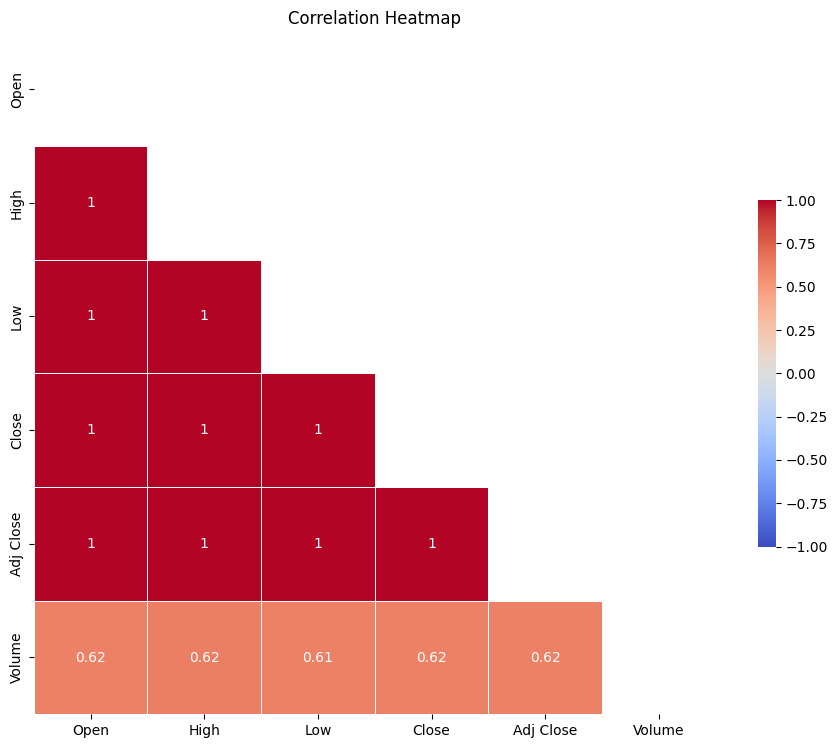

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Choose a different diverging colormap
cmap = "coolwarm"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()


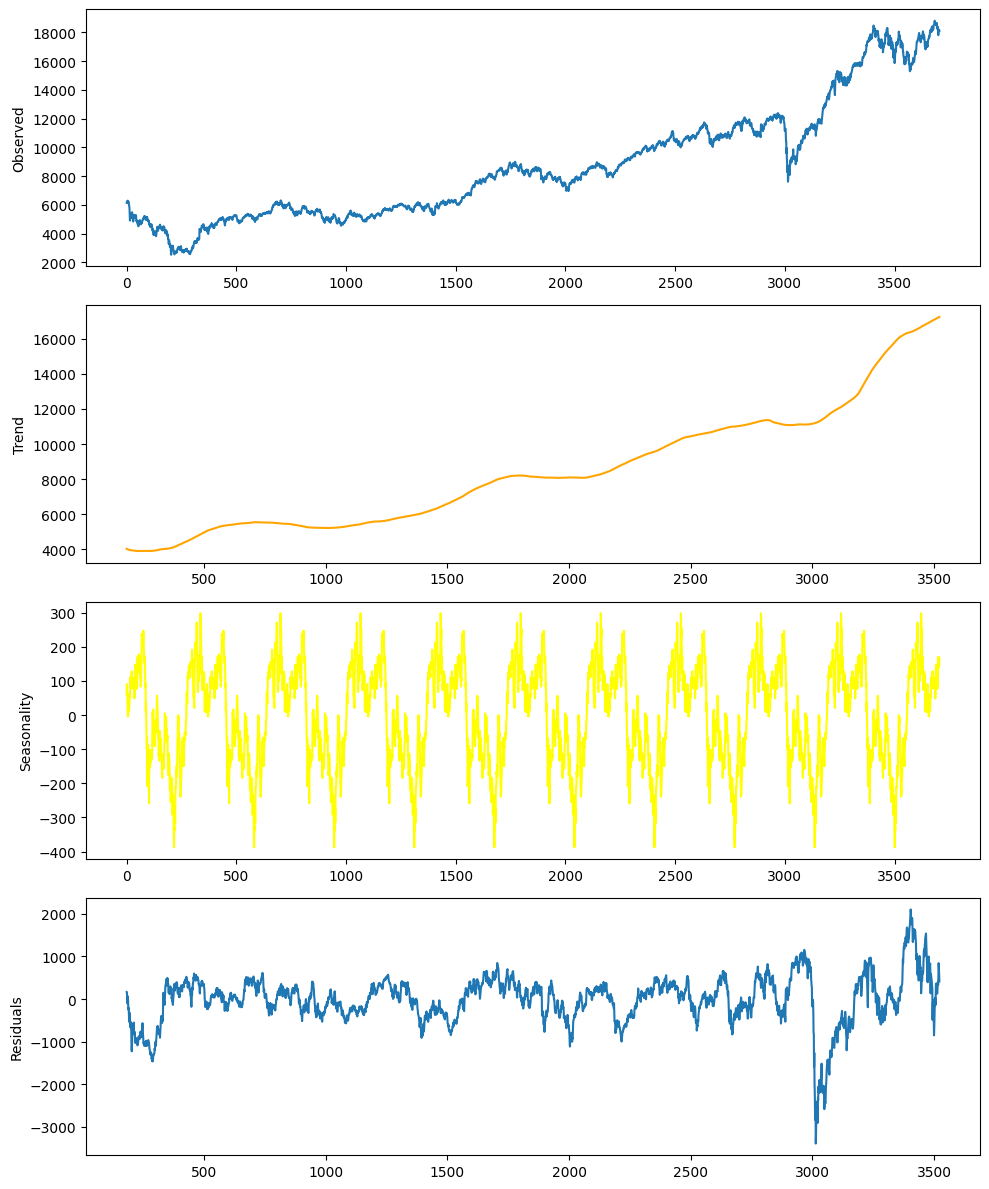

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=365)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')

result.trend.plot(ax=ax[1], color='orange')
ax[1].set_ylabel('Trend')

result.seasonal.plot(ax=ax[2], color='yellow')
ax[2].set_ylabel('Seasonality')

result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


1. The first sub plot above shows the actutal 'Close' prices.
2. The second subplot shows the long-term trends in the 'Close' prices, with short-term fluctuations smoothed out.
3.The third subplot shows the seasonal pattern in the 'Close' prices.
4.the fourth subplot shows the residuals, which are the differences between the observed 'Close' prices and vlaues predicted by the trend and seasonal compontents. This can be thought of as the 'noise' or unexplained variation in the data.

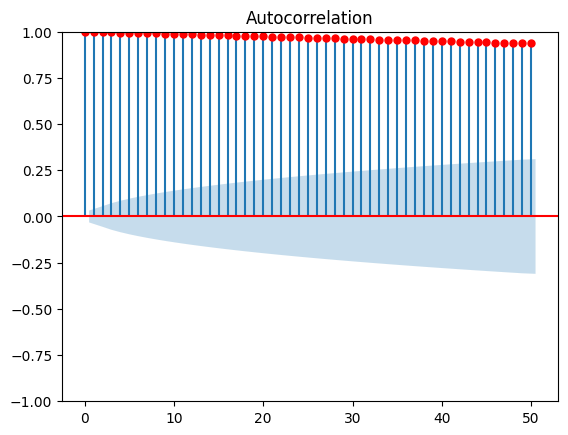

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the autocorrelation function (ACF)
plot_acf(df['Close'], lags=50, color='red')
plt.show()

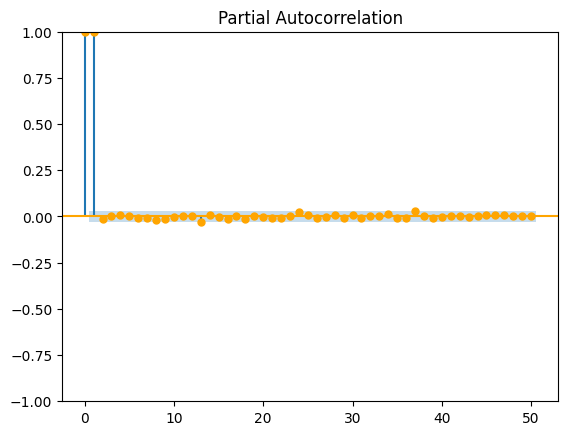

In [60]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_pacf

# Plot the partial autocorrelation function (PACF)
plot_pacf(df['Close'], lags=50, color='orange')
plt.show()


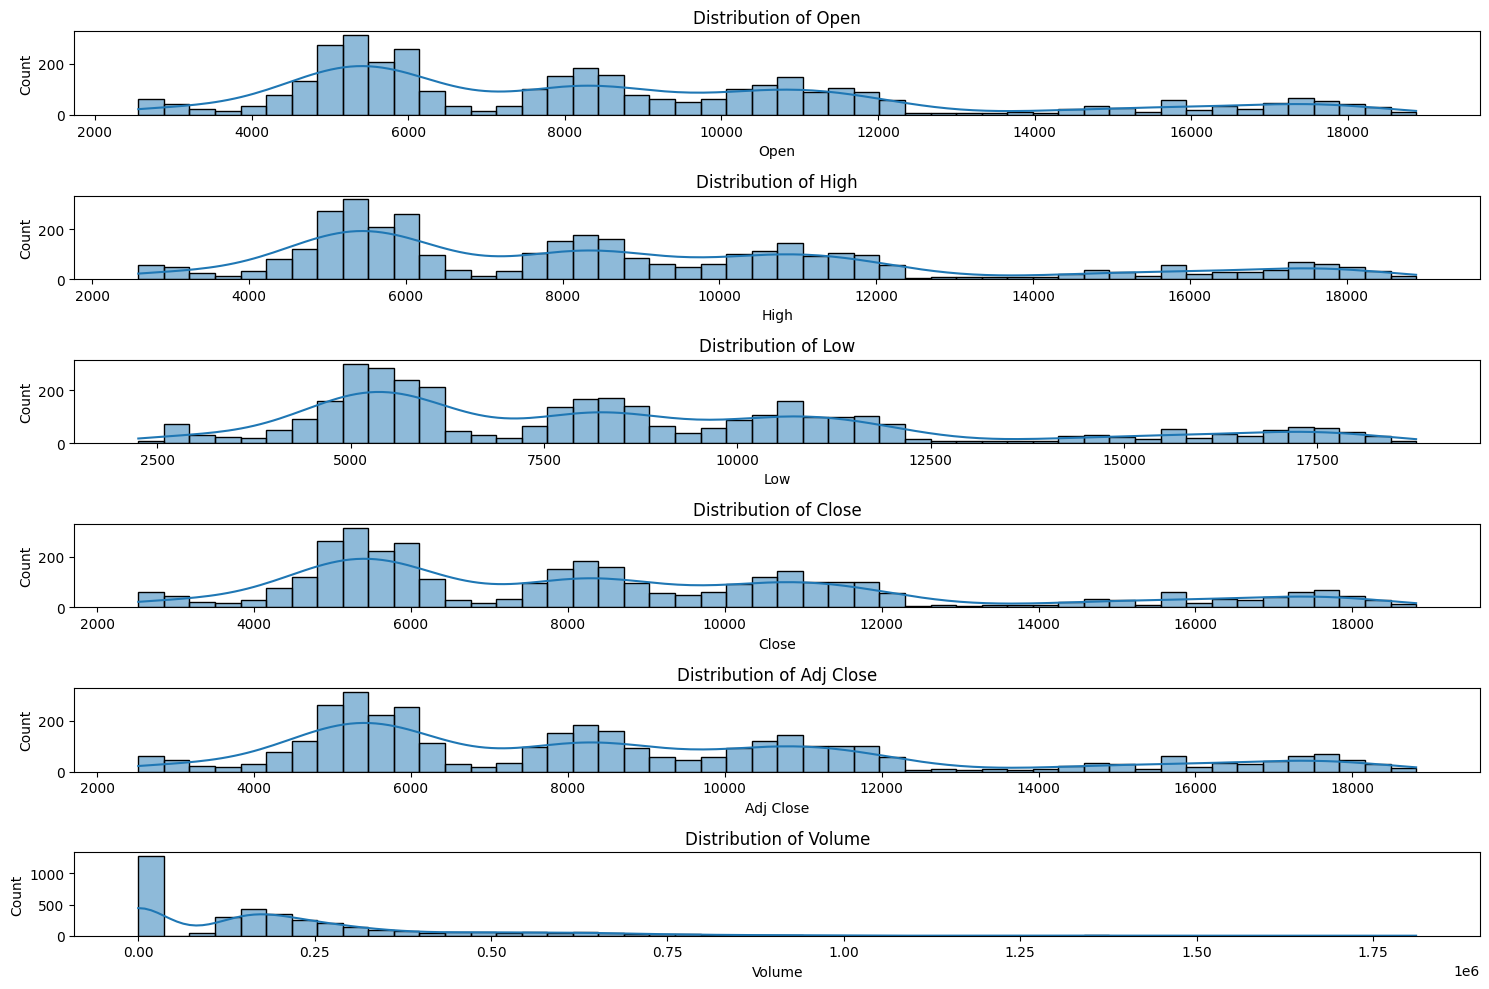

In [61]:
# Plot the distribution of the 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
n = len(cols)

# Set the figure size
plt.figure(figsize=(15, 10))

for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.histplot(df[cols[i]], kde=True, bins=50)
    plt.title(f'Distribution of {cols[i]}')
    plt.xlabel(cols[i])
    plt.tight_layout()

plt.show()


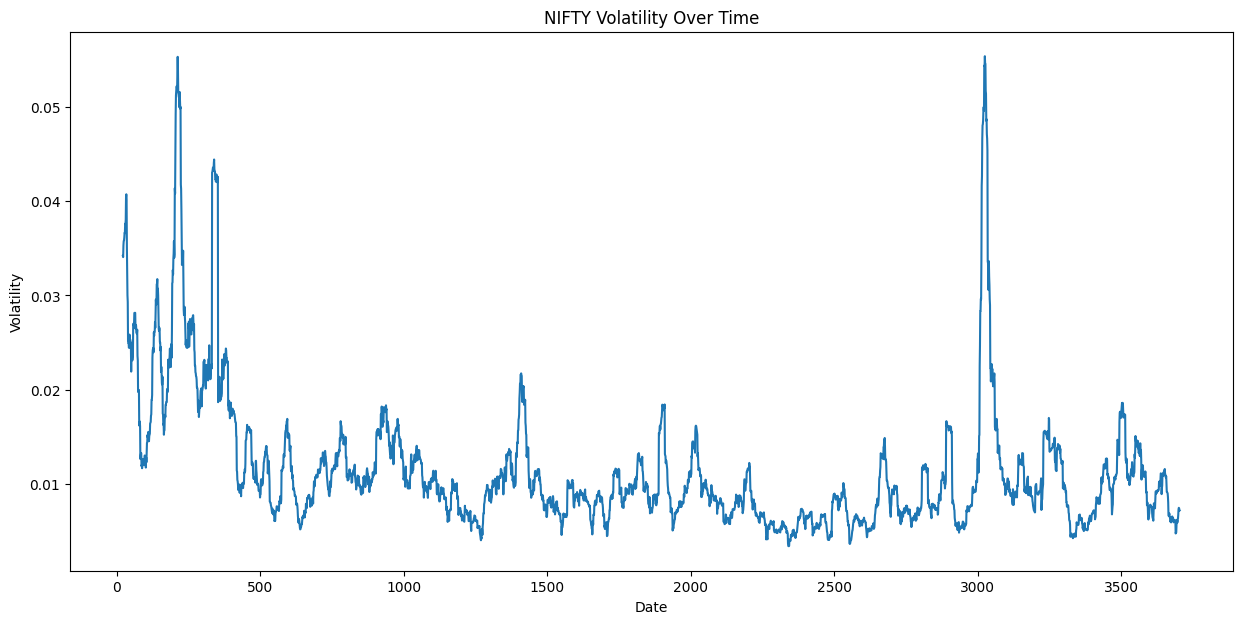

In [62]:
# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Calculate the rolling standard deviation of the returns (volatility) with a 21-day window
df['Volatility'] = df['Return'].rolling(window=21).std()

# Plot the volatility
plt.figure(figsize=(15, 7))
sns.lineplot(x=df.index, y=df['Volatility'])
plt.title('NIFTY Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


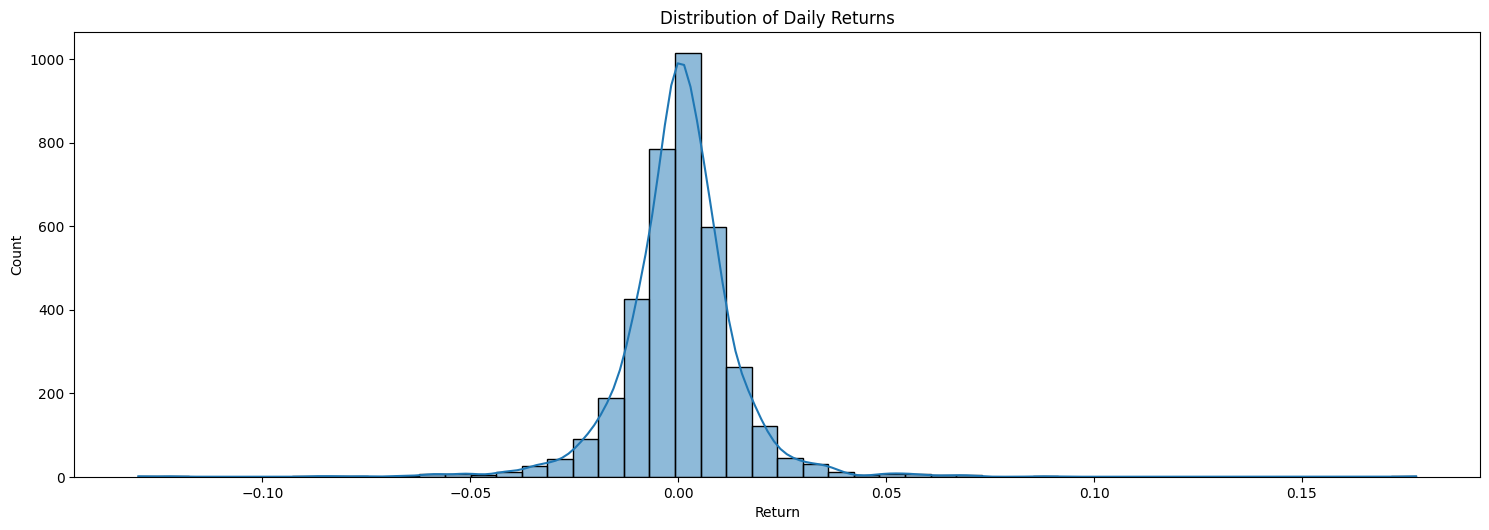

In [63]:
# Assume 'Date' is the column in df containing the dates
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Now you can resample
df['Monthly Return'] = df['Close'].resample('M').ffill().pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.histplot(df['Return'].dropna(), kde=True, bins=50 )
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.tight_layout()
plt.show()


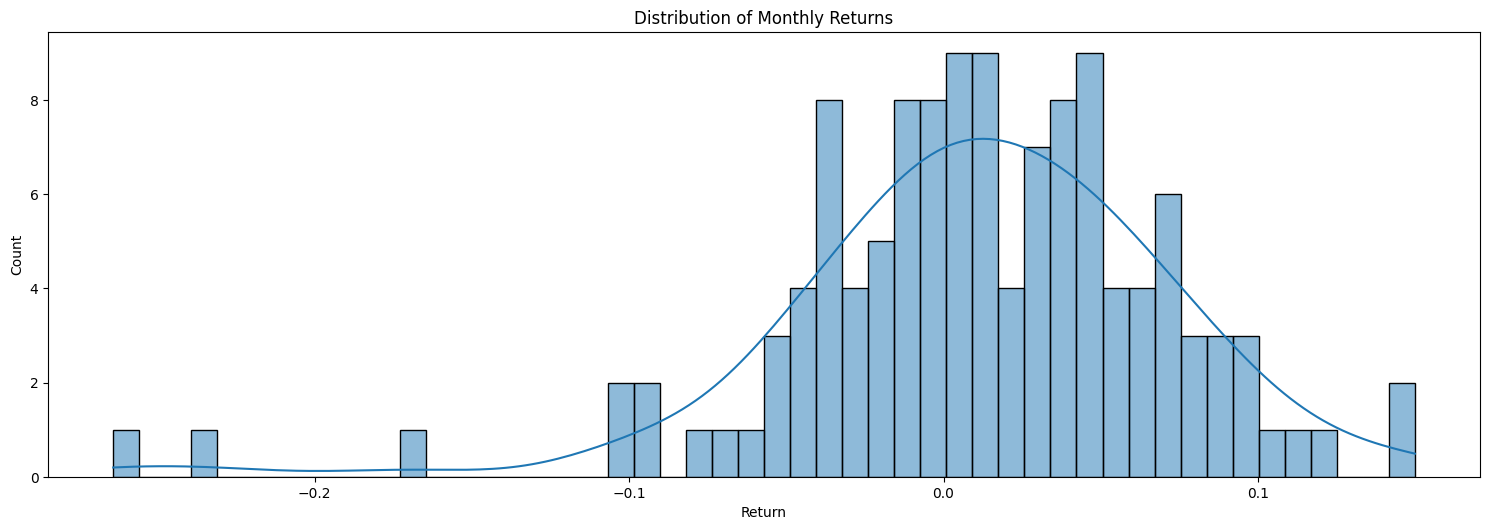

In [64]:
# Plot the distribution of monthly returns
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
sns.histplot(df['Monthly Return'].dropna(), kde=True, bins=50)
plt.title('Distribution of Monthly Returns')
plt.xlabel('Return')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

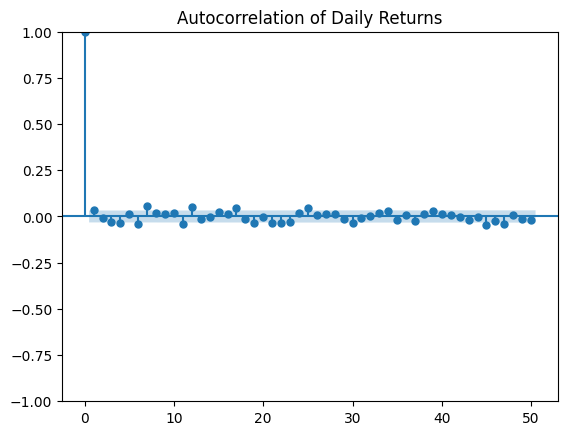

In [65]:
# Plot the ACF and PACF for daily returns
plt.figure(figsize=(10, 5))
plot_acf(df['Return'].dropna(), lags=50)
plt.title('Autocorrelation of Daily Returns')
plt.show()


<Figure size 1000x500 with 0 Axes>

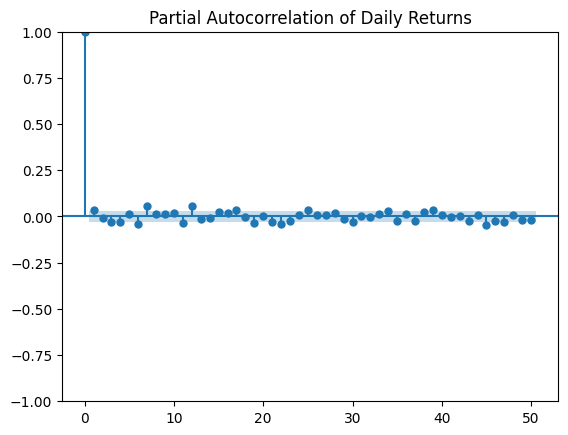

In [66]:
plt.figure(figsize=(10, 5))
plot_pacf(df['Return'].dropna(), lags=50)
plt.title('Partial Autocorrelation of Daily Returns')
plt.show()

<Figure size 1000x500 with 0 Axes>

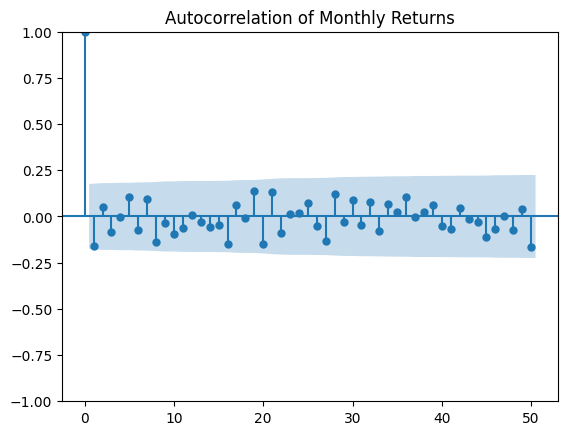

In [67]:
# Plot the ACF and PACF for monthly returns
plt.figure(figsize=(10, 5))
plot_acf(df['Monthly Return'].dropna(), lags=50)
plt.title('Autocorrelation of Monthly Returns')
plt.show()

<Figure size 1000x500 with 0 Axes>

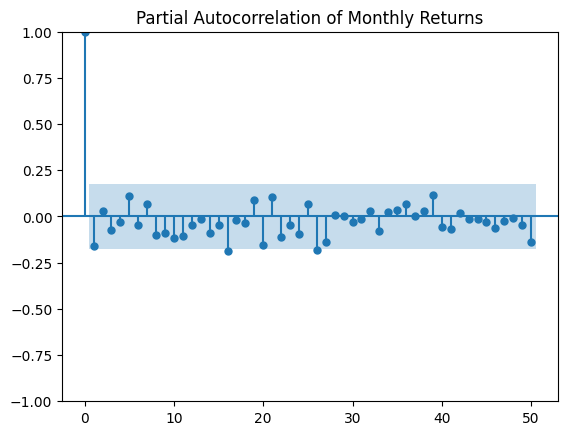

In [68]:
plt.figure(figsize=(10, 5))
plot_pacf(df['Monthly Return'].dropna(), lags=50)
plt.title('Partial Autocorrelation of Monthly Returns')
plt.show()


In [69]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the 'Close' price
result = adfuller(df['Close'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.6179831626711976
p-value: 0.9880505969526673
Critical Values:
   1%: -3.4321224410657236
   5%: -2.8623231662354693
   10%: -2.5671868908001723


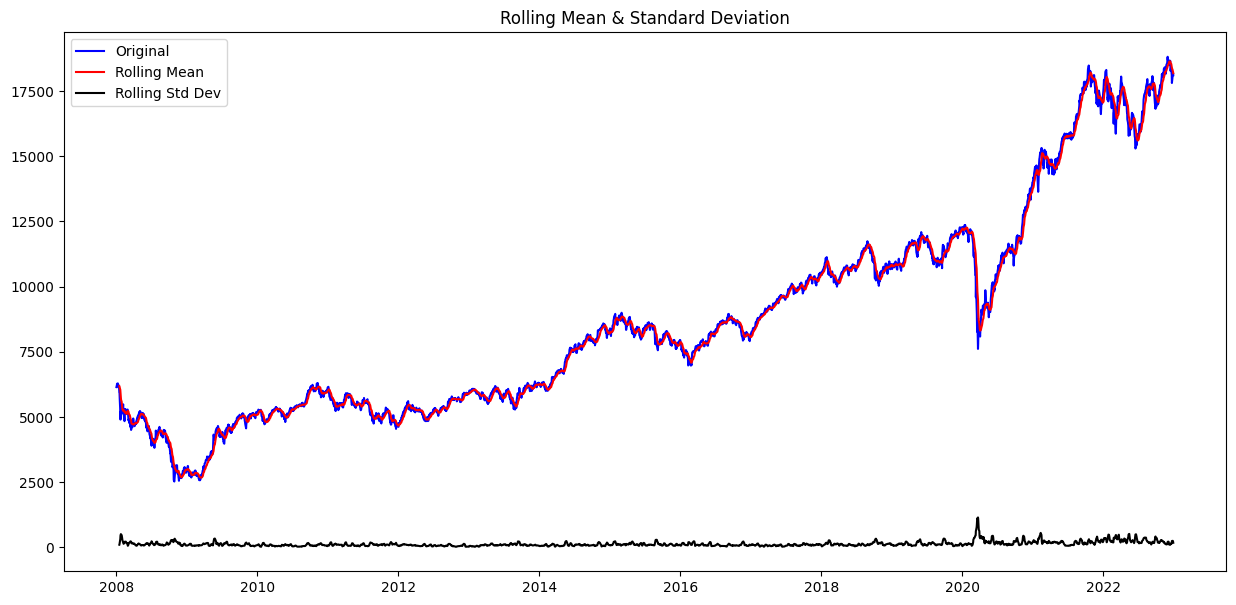

In [70]:
# Plot the 'Close' price with the rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

plt.figure(figsize=(15, 7))
plt.plot(df['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


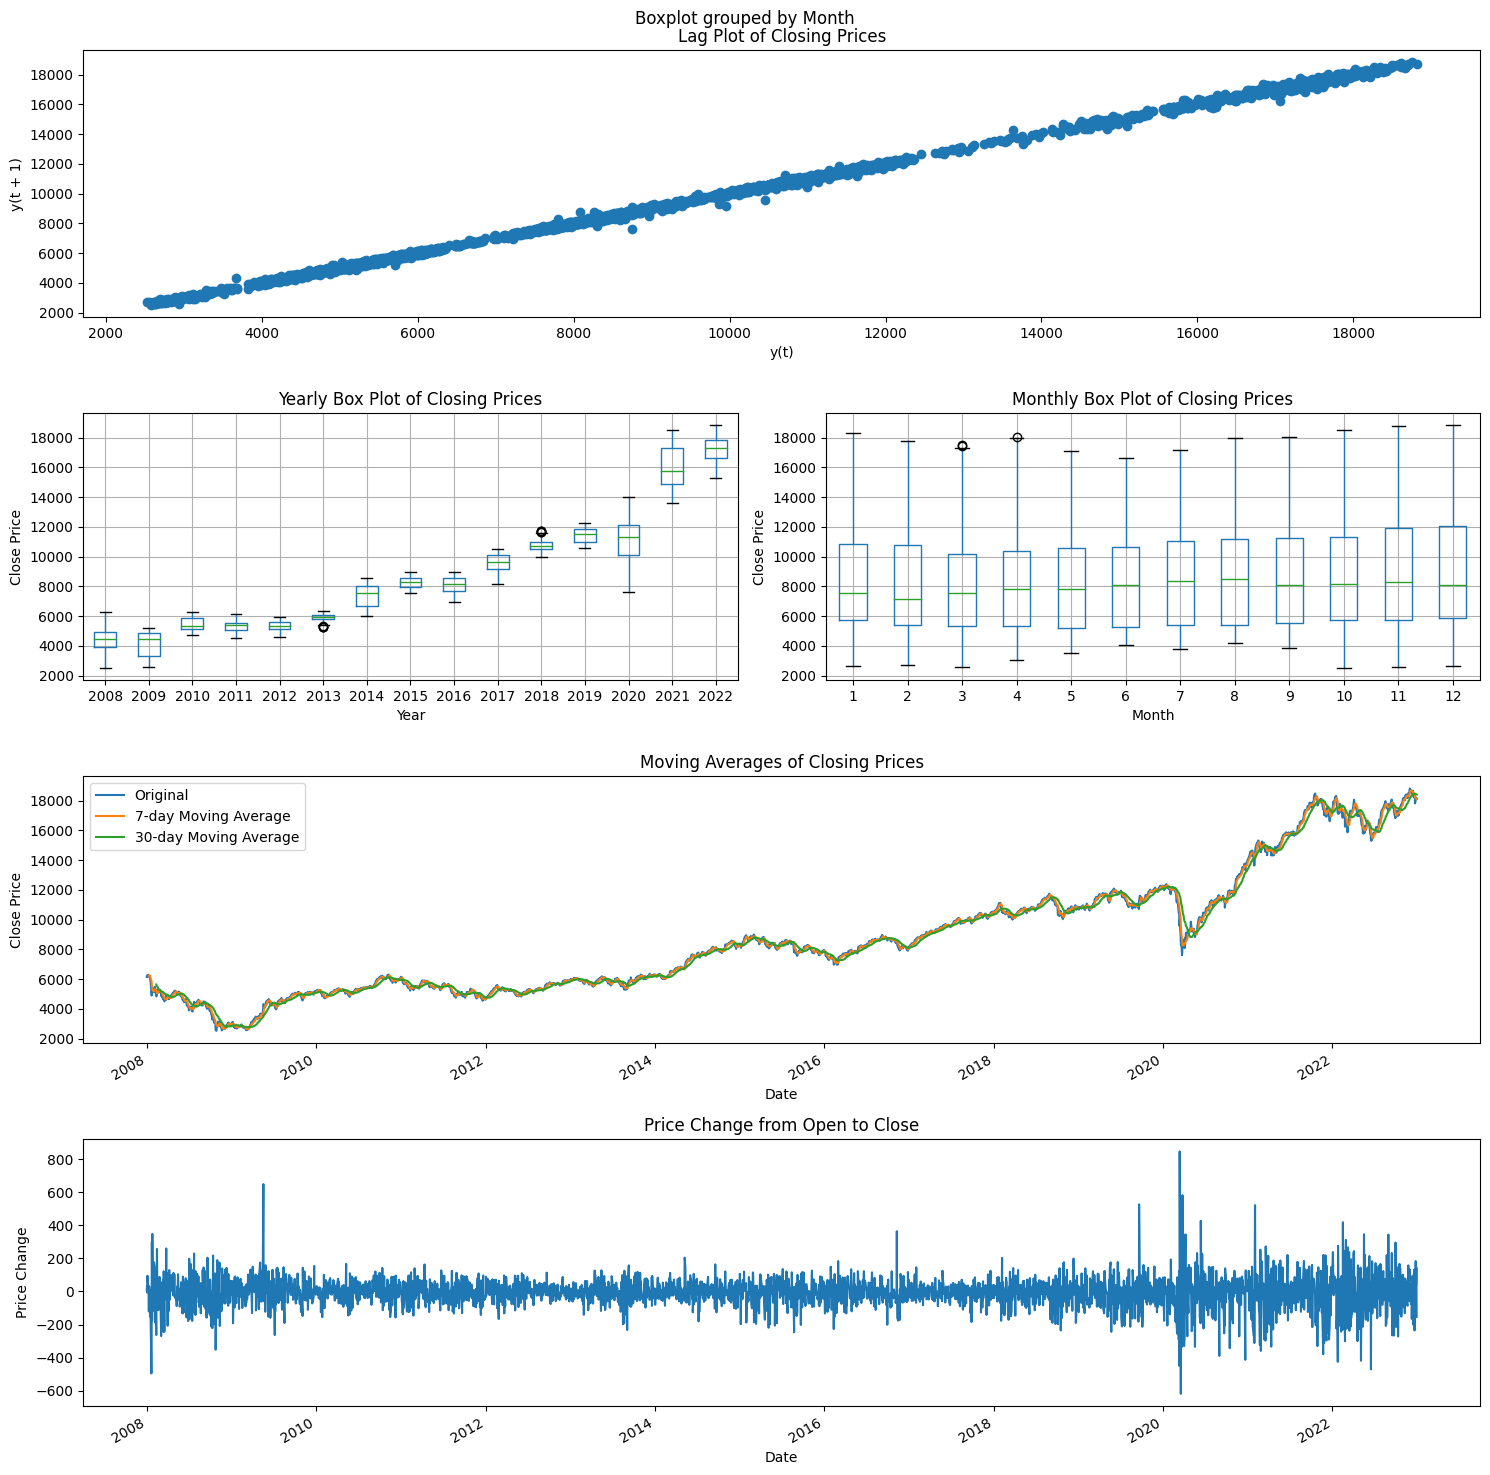

In [71]:
from pandas.plotting import lag_plot
from matplotlib.gridspec import GridSpec

# Create a grid for multiple plots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 2, figure=fig)

# Lag Plot
ax1 = fig.add_subplot(gs[0, :])
lag_plot(df['Close'])
plt.title('Lag Plot of Closing Prices')

# Box Plot per Year
ax2 = fig.add_subplot(gs[1, 0])
df['Year'] = df.index.year
df.boxplot(column='Close', by='Year', ax=ax2)
plt.title('Yearly Box Plot of Closing Prices')
plt.xlabel('Year')
plt.ylabel('Close Price')

# Box Plot per Month
ax3 = fig.add_subplot(gs[1, 1])
df['Month'] = df.index.month
df.boxplot(column='Close', by='Month', ax=ax3)
plt.title('Monthly Box Plot of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Close Price')

# Moving Averages
ax4 = fig.add_subplot(gs[2, :])
df['Close'].plot(ax=ax4, label='Original')
df['Close'].rolling(window=7).mean().plot(ax=ax4, label='7-day Moving Average')
df['Close'].rolling(window=30).mean().plot(ax=ax4, label='30-day Moving Average')
plt.title('Moving Averages of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Price Change from Open to Close
ax5 = fig.add_subplot(gs[3, :])
df['Price Change'] = df['Close'] - df['Open']
df['Price Change'].plot(ax=ax5)
plt.title('Price Change from Open to Close')
plt.xlabel('Date')
plt.ylabel('Price Change')

plt.tight_layout()
plt.show()


# 2 LSTM

In [72]:
!pip install tensorflow
!pip install keras


In [189]:
# Assuming 'df' is your DataFrame and 'Close' is the column you are predicting
print(dfcopy1['Close'].describe())


count     3705.000000
mean      8701.888531
std       3974.098655
min       2524.199951
25%       5431.649902
50%       8047.299805
75%      10891.599609
max      18812.500000
Name: Close, dtype: float64


In [190]:
# Assume df is your DataFrame and 'Close' is the column you want to predict

# Data preprocessing
data = dfcopy1.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [191]:
from sklearn.model_selection import train_test_split
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len - 60: , :]

# Preparing the training data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays and reshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [192]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training data shape: (2323, 60, 1)
Training labels shape: (2323,)
Validation data shape: (581, 60, 1)
Validation labels shape: (581,)


In [193]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=15))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 15)                765       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 31,381
Trainable params: 31,381
Non-trainable params: 0
_________________________________________________________________


In [194]:
from keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min') # You can change patience as needed

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data and early stopping
history = model.fit(x_train, y_train, batch_size=1, epochs=3, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/3
2323/2323 [==============================] - 36s 12ms/step - loss: 7.3749e-04 - val_loss: 4.0919e-04
Epoch 2/3
2323/2323 [==============================] - 27s 12ms/step - loss: 1.9053e-04 - val_loss: 8.7069e-05
Epoch 3/3
2323/2323 [==============================] - 27s 12ms/step - loss: 1.4997e-04 - val_loss: 1.2025e-04


In [195]:

# Prepare the test data
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [196]:

# Convert x_test to a numpy array and reshape it to 3D
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [197]:
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Test data shape: (741, 60, 1)
Test labels shape: (741, 1)


In [198]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# You now have the predicted prices in the 'predictions' variable

24/24 [==============================] - 1s 5ms/step


In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Assuming y_test are your true values and predictions are your model's predictions

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 373601.8271849353
Root Mean Squared Error: 611.2297662785536
Mean Absolute Error: 535.5460776720648


In [200]:
print(predictions)


[[11854.933 ]
 [11900.453 ]
 [11962.641 ]
 [12029.475 ]
 [12081.594 ]
 [12102.535 ]
 [12109.881 ]
 [12108.893 ]
 [12065.35  ]
 [12010.738 ]
 [11954.794 ]
 [11944.761 ]
 [11973.738 ]
 [11962.281 ]
 [11925.241 ]
 [11918.131 ]
 [11890.838 ]
 [11845.15  ]
 [11730.405 ]
 [11726.687 ]
 [11787.1875]
 [11858.25  ]
 [11891.954 ]
 [11879.808 ]
 [11882.086 ]
 [11915.046 ]
 [11934.651 ]
 [11924.059 ]
 [11887.948 ]
 [11841.971 ]
 [11853.883 ]
 [11862.994 ]
 [11789.558 ]
 [11712.79  ]
 [11625.491 ]
 [11554.566 ]
 [11378.512 ]
 [11219.4375]
 [11176.53  ]
 [11163.971 ]
 [11169.958 ]
 [11088.015 ]
 [10840.777 ]
 [10638.265 ]
 [10247.895 ]
 [10061.091 ]
 [ 9760.865 ]
 [ 9467.779 ]
 [ 9125.506 ]
 [ 8824.77  ]
 [ 8782.572 ]
 [ 8480.874 ]
 [ 8261.743 ]
 [ 8287.149 ]
 [ 8465.322 ]
 [ 8623.676 ]
 [ 8595.354 ]
 [ 8607.322 ]
 [ 8511.781 ]
 [ 8361.462 ]
 [ 8457.597 ]
 [ 8577.03  ]
 [ 8773.026 ]
 [ 8884.397 ]
 [ 8909.706 ]
 [ 8919.848 ]
 [ 9005.155 ]
 [ 9081.468 ]
 [ 9044.923 ]
 [ 9054.582 ]
 [ 9114.574 ]
 [ 912

In [201]:
# Creating a DataFrame for the actual and predicted prices
valid = dfcopy1[train_data_len:]
valid['Predictions'] = predictions


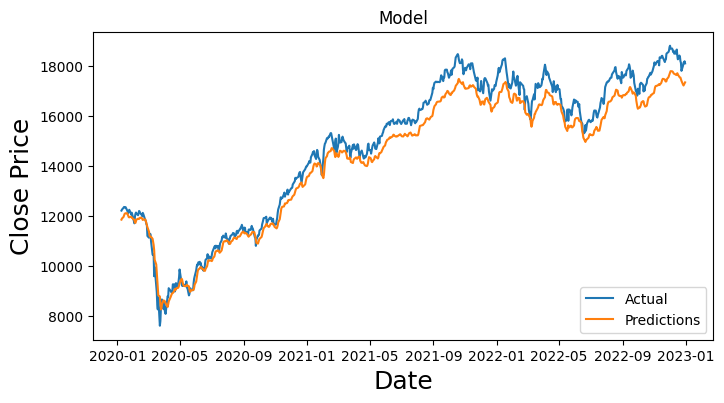

In [202]:
# Ensure the 'Date' column is set as the index
if 'Date' in dfcopy1.columns:
    dfcopy1.set_index('Date', inplace=True)

valid = dfcopy1[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()


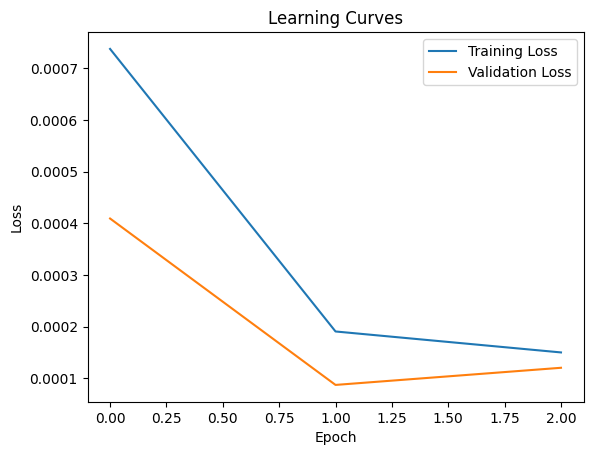

In [203]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [204]:
# Get the last 60 days of closing prices and transform the data to 3D
last_60_days = dfcopy1['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))
X_last_60_days = np.array([last_60_days_scaled])
X_last_60_days = np.reshape(X_last_60_days, (X_last_60_days.shape[0], X_last_60_days.shape[1], 1))

# Predict the next day's closing price
predicted_price = model.predict(X_last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)  # undo scaling

print("Predicted next day's closing price: ", predicted_price)


1/1 [==============================] - 0s 23ms/step
Predicted next day's closing price:  [[17340.906]]


In [205]:
future_days = 60
predictions  = []

# Start with the last data in the training dataset
last_60_days = dfcopy1['Close'][-60:].values

for i in range(future_days):
    last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))
    X_last_60_days = np.array([last_60_days_scaled])
    X_last_60_days = np.reshape(X_last_60_days, (X_last_60_days.shape[0], X_last_60_days.shape[1], 1))

    # Predict the next day's closing price
    predicted_price = model.predict(X_last_60_days)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)  # undo scaling

    # Append the predicted price to the list of predictions
    predictions.append(predicted_price_unscaled[0,0])

    # Append the predicted price to the last 60 days array and use the last 60 days for the next prediction
    last_60_days = np.append(last_60_days, predicted_price_unscaled)
    last_60_days = last_60_days[1:]




1/1 [==============================] - 0s 26ms/step


In [206]:
print(predictions)

[17340.906, 17070.244, 16763.621, 16471.654, 16210.233, 15980.988, 15779.779, 15600.501, 15436.994, 15283.996, 15137.538, 14994.982, 14854.851, 14716.555, 14580.1, 14445.821, 14314.178, 14185.611, 14060.459, 13938.926, 13821.087, 13706.902, 13596.252, 13488.968, 13384.862, 13283.744, 13185.435, 13089.778, 12996.639, 12905.903, 12817.475, 12731.271, 12647.217, 12565.249, 12485.304, 12407.321, 12331.24, 12257.009, 12184.567, 12113.857, 12044.83, 11977.428, 11911.603, 11847.307, 11784.49, 11723.111, 11663.127, 11604.495, 11547.18, 11491.14, 11436.343, 11382.751, 11330.335, 11279.061, 11228.897, 11179.816, 11131.788, 11084.784, 11038.779, 10993.748]


In [207]:
for i in range(future_days):
    print(f"Day {i+1}: {predictions[i]}")


Day 1: 17340.90625
Day 2: 17070.244140625
Day 3: 16763.62109375
Day 4: 16471.654296875
Day 5: 16210.2333984375
Day 6: 15980.98828125
Day 7: 15779.779296875
Day 8: 15600.5009765625
Day 9: 15436.994140625
Day 10: 15283.99609375
Day 11: 15137.5380859375
Day 12: 14994.982421875
Day 13: 14854.8505859375
Day 14: 14716.5546875
Day 15: 14580.099609375
Day 16: 14445.8212890625
Day 17: 14314.177734375
Day 18: 14185.611328125
Day 19: 14060.458984375
Day 20: 13938.92578125
Day 21: 13821.0869140625
Day 22: 13706.90234375
Day 23: 13596.251953125
Day 24: 13488.9677734375
Day 25: 13384.8623046875
Day 26: 13283.744140625
Day 27: 13185.4345703125
Day 28: 13089.7783203125
Day 29: 12996.638671875
Day 30: 12905.9033203125
Day 31: 12817.474609375
Day 32: 12731.271484375
Day 33: 12647.216796875
Day 34: 12565.2490234375
Day 35: 12485.3037109375
Day 36: 12407.3212890625
Day 37: 12331.240234375
Day 38: 12257.0087890625
Day 39: 12184.5673828125
Day 40: 12113.857421875
Day 41: 12044.830078125
Day 42: 11977.427734

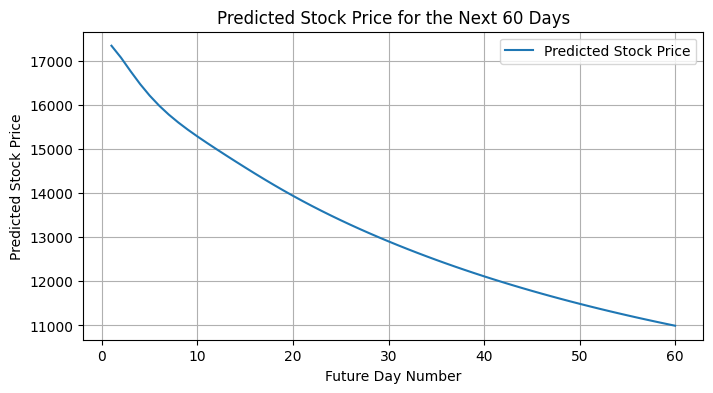

In [208]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 61), predictions, label='Predicted Stock Price')  # change 'future_dates' to 'range(1, 61)'
plt.title('Predicted Stock Price for the Next 60 Days')
plt.xlabel('Future Day Number')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# 2.Hyper-parameter tuning for the LSTM model

In [209]:
!pip install -U keras-tuner

In [210]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units',
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                          input_shape=(x_train.shape[1], 1)))
    model.add(layers.Dropout(rate=hp.Float(
                'dropout',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            )))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm')

tuner.search_space_summary()

tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

tuner.results_summary()


Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
Results summary
Results in my_dir/lstm
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 4 summary
Hyperparameters:
units: 128
dropout: 0.05
learning_rate: 0.0001
Score: 227924266.66666666

Trial 3 summary
Hyperparameters:
units: 96
dropout: 0.05
learning_rate: 0.0001
Score: 227924330.66666666

Trial 1 summary
Hyperparameters:
units: 128
dropout: 0.35000000000000003
learning_rate: 0.01
Score: 227925968.0

Trial 2 summary
Hyperparameters:
units: 32
dropout: 0.4
learning_rate: 0.01
Score: 227926181.33333334

Trial 0 summary
Hyperparameters:
units: 384
dropout: 0.350000000

In [211]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print a summary of the best model
best_model.summary()

# Get the hyperparameters of the best model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the hyperparameters of the best model
print(best_hyperparameters)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [212]:
# Get the best hyperparameters from the tuner
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print("Number of LSTM units:", best_hyperparameters.get('units'))
print("Dropout rate:", best_hyperparameters.get('dropout'))
print("Learning rate:", best_hyperparameters.get('learning_rate'))


Best Hyperparameters:
Number of LSTM units: 128
Dropout rate: 0.05
Learning rate: 0.0001


## 2.GRU (Gated Recurrent Units)

In [213]:
print(dfcopy2['Close'].describe())

count     3705.000000
mean      8701.888531
std       3974.098655
min       2524.199951
25%       5431.649902
50%       8047.299805
75%      10891.599609
max      18812.500000
Name: Close, dtype: float64


In [214]:
# Data preprocessing
data = dfcopy2.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [215]:
# Splitting the data
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len - 60: , :]

# Preparing the training data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays and reshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training data shape: (2323, 60, 1)
Training labels shape: (2323,)
Validation data shape: (581, 60, 1)
Validation labels shape: (581,)


In [216]:
from keras.layers import GRU

# Building the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=15))
model.add(Dense(units=1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 24,031
Trainable params: 24,031
Non-trainable params: 0
_________________________________________________________________


In [217]:

# Compile and train the model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=1, epochs=3, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/3
2323/2323 [==============================] - 55s 22ms/step - loss: 4.1466e-04 - val_loss: 2.2947e-04
Epoch 2/3
2323/2323 [==============================] - 30s 13ms/step - loss: 1.2628e-04 - val_loss: 4.8191e-05
Epoch 3/3
2323/2323 [==============================] - 25s 11ms/step - loss: 9.7861e-05 - val_loss: 4.9965e-05


In [218]:
 #Prepare the test data
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array and reshape it
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Test data shape: (741, 60, 1)
Test labels shape: (741, 1)


In [219]:
# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 1s 5ms/step


In [220]:
# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(predictions)

Mean Squared Error: 194969.94641141355
Root Mean Squared Error: 441.55401301699607
Mean Absolute Error: 392.4243098168438
[[11831.683 ]
 [12019.969 ]
 [12048.683 ]
 [12123.676 ]
 [12153.464 ]
 [12136.155 ]
 [12150.592 ]
 [12146.588 ]
 [12022.456 ]
 [11975.935 ]
 [11913.295 ]
 [11986.072 ]
 [12045.933 ]
 [11918.199 ]
 [11865.567 ]
 [11936.794 ]
 [11839.533 ]
 [11774.417 ]
 [11527.689 ]
 [11801.558 ]
 [11886.837 ]
 [11936.643 ]
 [11898.993 ]
 [11838.438 ]
 [11915.573 ]
 [12000.673 ]
 [11972.163 ]
 [11916.889 ]
 [11853.705 ]
 [11803.496 ]
 [11933.759 ]
 [11881.023 ]
 [11642.326 ]
 [11622.901 ]
 [11500.482 ]
 [11460.292 ]
 [11039.303 ]
 [10988.75  ]
 [11141.787 ]
 [11080.891 ]
 [11104.003 ]
 [10831.741 ]
 [10325.505 ]
 [10340.239 ]
 [ 9494.642 ]
 [ 9855.06  ]
 [ 9104.579 ]
 [ 8904.31  ]
 [ 8416.781 ]
 [ 8214.406 ]
 [ 8638.555 ]
 [ 7585.561 ]
 [ 7756.0874]
 [ 8201.179 ]
 [ 8509.151 ]
 [ 8543.368 ]
 [ 8205.382 ]
 [ 8499.0625]
 [ 8175.038 ]
 [ 8022.8228]
 [ 8664.366 ]
 [ 8626.352 ]
 [ 8983.73

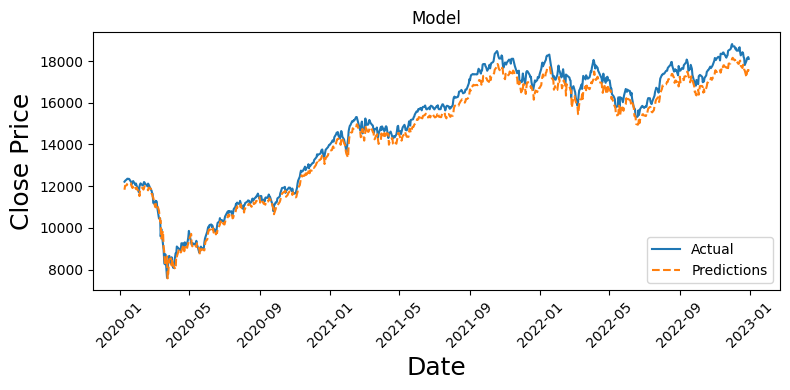

In [221]:
# Ensure the 'Date' column is set as the index
if 'Date' in dfcopy2.columns:
    dfcopy2.set_index('Date', inplace=True)

valid = dfcopy2[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid.index, valid['Close'], label='Actual')
plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='--')
plt.legend(loc='lower right')

# Ensure x-axis displays years
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


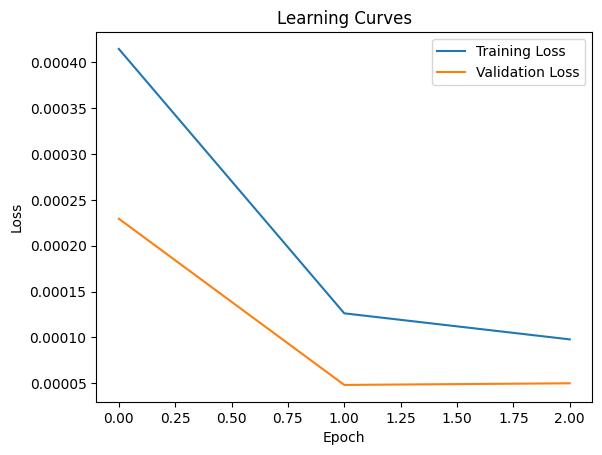

In [222]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [223]:
# Predicting next day's closing price
last_60_days = dfcopy2['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))
X_last_60_days = np.array([last_60_days_scaled])
X_last_60_days = np.reshape(X_last_60_days, (X_last_60_days.shape[0], X_last_60_days.shape[1], 1))

predicted_price = model.predict(X_last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)  # undo scaling


1/1 [==============================] - 0s 23ms/step


In [224]:
print("Predicted next day's closing price: ", predicted_price)

# Predicting the next 60 days' prices
future_days = 60
predictions  = []

last_60_days = dfcopy2['Close'][-60:].values
for i in range(future_days):
    last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))
    X_last_60_days = np.array([last_60_days_scaled])
    X_last_60_days = np.reshape(X_last_60_days, (X_last_60_days.shape[0], X_last_60_days.shape[1], 1))

    predicted_price = model.predict(X_last_60_days)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    predictions.append(predicted_price_unscaled[0,0])
    last_60_days = np.append(last_60_days, predicted_price_unscaled)
    last_60_days = last_60_days[1:]

print(predictions)

Predicted next day's closing price:  [[17509.719]]
1/1 [==============================] - 0s 36ms/step
[17509.719, 16937.826, 16440.701, 15991.267, 15579.623, 15199.385, 14846.209, 14516.667, 14207.941, 13917.677, 13643.885, 13384.871, 13139.182, 12905.557, 12682.909, 12470.284, 12266.851, 12071.873, 11884.701, 11704.759, 11531.528, 11364.551, 11203.413, 11047.741, 10897.199, 10751.48, 10610.31, 10473.433, 10340.618, 10211.654, 10086.347, 9964.517, 9846.0, 9730.644, 9618.307, 9508.858, 9402.179, 9298.154, 9196.679, 9097.654, 9000.989, 8906.597, 8814.396, 8724.3125, 8636.274, 8550.214, 8466.067, 8383.775, 8303.28, 8224.529, 8147.47, 8072.0557, 7998.239, 7925.975, 7855.224, 7785.9453, 7718.1, 7651.6523, 7586.568, 7522.812]


In [225]:
for i in range(future_days):
    print(f"Day {i+1}: {predictions[i]}")



Day 1: 17509.71875
Day 2: 16937.826171875
Day 3: 16440.701171875
Day 4: 15991.2666015625
Day 5: 15579.623046875
Day 6: 15199.384765625
Day 7: 14846.208984375
Day 8: 14516.6669921875
Day 9: 14207.94140625
Day 10: 13917.6767578125
Day 11: 13643.884765625
Day 12: 13384.87109375
Day 13: 13139.181640625
Day 14: 12905.556640625
Day 15: 12682.9091796875
Day 16: 12470.2841796875
Day 17: 12266.8505859375
Day 18: 12071.873046875
Day 19: 11884.701171875
Day 20: 11704.7587890625
Day 21: 11531.5283203125
Day 22: 11364.55078125
Day 23: 11203.4130859375
Day 24: 11047.7412109375
Day 25: 10897.19921875
Day 26: 10751.48046875
Day 27: 10610.3095703125
Day 28: 10473.4326171875
Day 29: 10340.6181640625
Day 30: 10211.654296875
Day 31: 10086.3466796875
Day 32: 9964.5166015625
Day 33: 9846.0
Day 34: 9730.6435546875
Day 35: 9618.306640625
Day 36: 9508.8583984375
Day 37: 9402.1787109375
Day 38: 9298.154296875
Day 39: 9196.6787109375
Day 40: 9097.654296875
Day 41: 9000.9892578125
Day 42: 8906.5966796875
Day 43: 

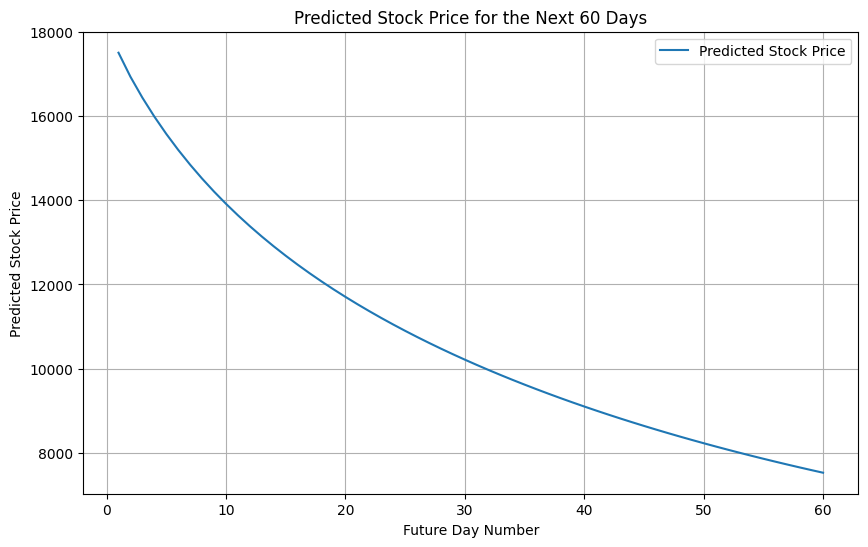

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 61), predictions, label='Predicted Stock Price')
plt.title('Predicted Stock Price for the Next 60 Days')
plt.xlabel('Future Day Number')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
!pip install keras-tuner


In [228]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first GRU layer
    hp_units_1 = hp.Int('units_1', min_value=30, max_value=300, step=30)
    model.add(layers.GRU(units=hp_units_1, return_sequences=True, input_shape=(x_train.shape[1], 1)))

    # Tune the number of units in the second GRU layer
    hp_units_2 = hp.Int('units_2', min_value=30, max_value=200, step=30)
    model.add(layers.GRU(units=hp_units_2, return_sequences=False))

    model.add(layers.Dense(1))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error')

    return model


In [229]:

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Set this to a suitable value
    executions_per_trial=3,  # Number of models to train per trial
    directory='gru_tuning',
    project_name='stock_prediction'
)

tuner.search_space_summary()

# Start the search for the best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)

# Print a summary of the results
tuner.results_summary()


Search space summary
Default search space size: 3
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 200, 'step': 30, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
Results summary
Results in gru_tuning/stock_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
units_1: 300
units_2: 90
learning_rate: 0.0001
Score: 6.609157814333837e-05

Trial 4 summary
Hyperparameters:
units_1: 180
units_2: 180
learning_rate: 0.0001
Score: 6.619585716786484e-05

Trial 0 summary
Hyperparameters:
units_1: 180
units_2: 60
learning_rate: 0.0001
Score: 6.636122028188159e-05

Trial 2 summary
Hyperparameters:
units_1: 60
units_2: 120
learning_rate: 0.0001
Score: 6.938553997315466e-05

Trial 3 summary
Hyperparameters:
units_

In [230]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


In [231]:
best_model = tuner.get_best_models(num_models=1)[0]


In [232]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 300)           272700    
                                                                 
 gru_1 (GRU)                 (None, 90)                105840    
                                                                 
 dense (Dense)               (None, 1)                 91        
                                                                 
Total params: 378,631
Trainable params: 378,631
Non-trainable params: 0
_________________________________________________________________


In [233]:
print("Best Hyperparameters:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")


Best Hyperparameters:
units_1: 300
units_2: 90
learning_rate: 0.0001


## Hybrid Model(LSTM+GRU)

In [318]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data preprocessing for dfcopy3
data = dfcopy3.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [319]:
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len - 60: , :]

# Preparing the training data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Prepare the test data
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [320]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class Time2Vec(Layer):
    def __init__(self, seq_len, **kwargs):
        super(Time2Vec, self).__init__()
        self.seq_len = seq_len

    def build(self, input_shape):
        '''Initialize weights and biases with shape (batch, seq_len)'''
        self.weights_linear = self.add_weight(name='weight_linear',
                                              shape=(int(self.seq_len),),
                                              initializer='uniform',
                                              trainable=True)

        self.bias_linear = self.add_weight(name='bias_linear',
                                           shape=(int(self.seq_len),),
                                           initializer='uniform',
                                           trainable=True)

        self.weights_periodic = self.add_weight(name='weight_periodic',
                                                shape=(int(self.seq_len),),
                                                initializer='uniform',
                                                trainable=True)

        self.bias_periodic = self.add_weight(name='bias_periodic',
                                             shape=(int(self.seq_len),),
                                             initializer='uniform',
                                             trainable=True)

    def call(self, x):
        '''Calculate linear and periodic time features'''
        x = tf.math.reduce_mean(x[:,:,:4], axis=-1)
        time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
        time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
        return tf.concat([time_linear, time_periodic], axis=-1) # (batch, seq_len, 2)

    def get_config(self): # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'seq_len': self.seq_len})
        return config


In [321]:
# Data Preprocessing and other steps as before...

# Create the Hybrid model with Time2Vec
hybrid_model = Sequential()
hybrid_model.add(Time2Vec(seq_len=x_train.shape[1]))
hybrid_model.add(tf.keras.layers.Reshape((x_train.shape[1], 2)))
hybrid_model.add(LSTM(50, return_sequences=True))
hybrid_model.add(GRU(50, return_sequences=False))
hybrid_model.add(Dense(25))
hybrid_model.add(Activation('relu'))
hybrid_model.add(Dense(1))

hybrid_model.build(input_shape=(None, x_train.shape[1], x_train.shape[2]))
hybrid_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time2_vec (Time2Vec)        (None, 120)               240       
                                                                 
 reshape (Reshape)           (None, 60, 2)             0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            10600     
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [322]:
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the hybrid model
history = hybrid_model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=1,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/3
2323/2323 [==============================] - 34s 13ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 2/3
2323/2323 [==============================] - 28s 12ms/step - loss: 1.8153e-04 - val_loss: 9.4342e-05
Epoch 3/3
2323/2323 [==============================] - 29s 12ms/step - loss: 1.2515e-04 - val_loss: 1.0647e-04


In [323]:
# Make predictions on the testing data
predictions = hybrid_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 1s 5ms/step


In [324]:

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 274018.9747212094
Root Mean Squared Error: 523.468217489094
Mean Absolute Error: 435.8132735897436


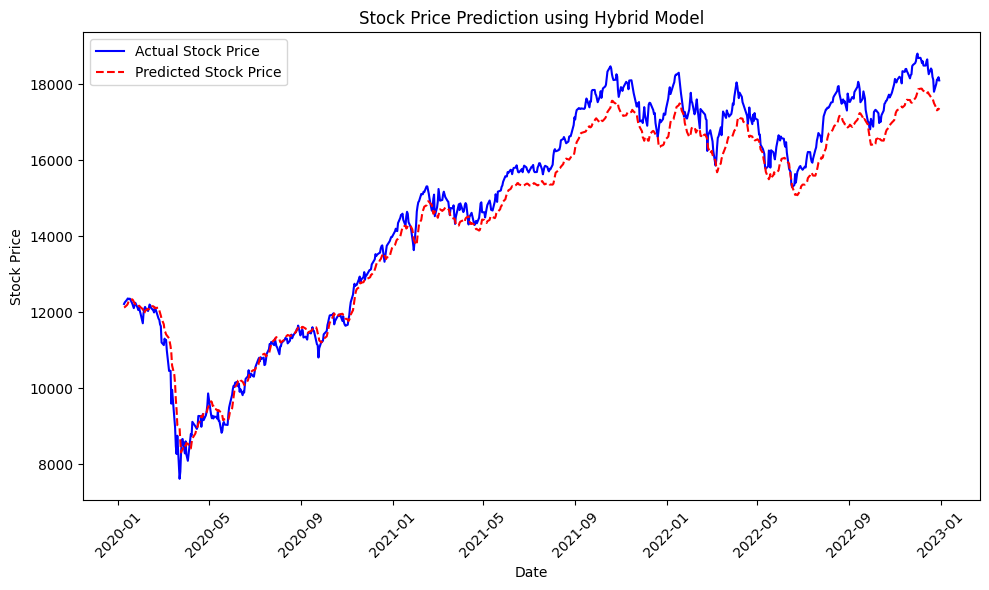

In [325]:
# Ensure the 'Date' column is set as the index
if 'Date' in dfcopy3.columns:
    dfcopy3['Date'] = pd.to_datetime(dfcopy3['Date'])
    dfcopy3.set_index('Date', inplace=True)

valid = dfcopy3[train_data_len:]
valid['Predictions'] = predictions

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(valid['Close'], color='blue', label='Actual Stock Price')
plt.plot(valid['Predictions'], color='red', linestyle='dashed', label='Predicted Stock Price')
plt.title('Stock Price Prediction using Hybrid Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


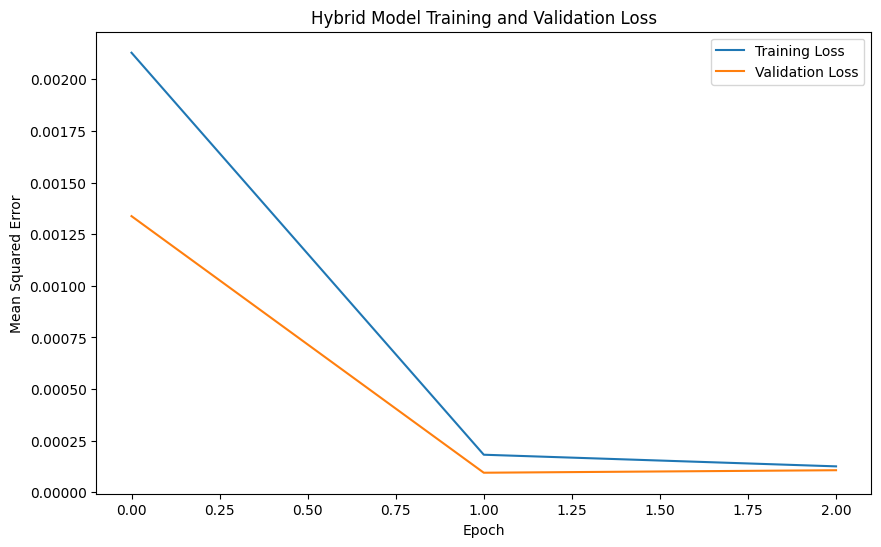

In [326]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Hybrid Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [327]:
# Prediction for the next 60 days
future_days = 60
predictions  = []
last_60_days = dfcopy3['Close'][-60:].values
for i in range(future_days):
    last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))
    X_last_60_days = np.array([last_60_days_scaled])
    X_last_60_days = np.reshape(X_last_60_days, (X_last_60_days.shape[0], X_last_60_days.shape[1], 1))
    predicted_price = hybrid_model.predict(X_last_60_days)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)
    predictions.append(predicted_price_unscaled[0,0])
    last_60_days = np.append(last_60_days, predicted_price_unscaled)
    last_60_days = last_60_days[1:]

# Print the predictions
for i in range(future_days):
    print(f"Day {i+1}: {predictions[i]}")

1/1 [==============================] - 0s 30ms/step
Day 1: 17379.4375
Day 2: 17194.744140625
Day 3: 16958.89453125
Day 4: 16783.537109375
Day 5: 16555.837890625
Day 6: 16375.29296875
Day 7: 16173.6611328125
Day 8: 16002.298828125
Day 9: 15818.015625
Day 10: 15656.1650390625
Day 11: 15491.4013671875
Day 12: 15342.70703125
Day 13: 15195.10546875
Day 14: 15058.5478515625
Day 15: 14925.435546875
Day 16: 14800.8193359375
Day 17: 14680.833984375
Day 18: 14567.6904296875
Day 19: 14460.0478515625
Day 20: 14357.99609375
Day 21: 14261.1591796875
Day 22: 14169.01953125
Day 23: 14081.8525390625
Day 24: 13998.8564453125
Day 25: 13920.26953125
Day 26: 13845.4013671875
Day 27: 13774.45703125
Day 28: 13706.9013671875
Day 29: 13642.81640625
Day 30: 13581.8046875
Day 31: 13523.8505859375
Day 32: 13468.6630859375
Day 33: 13416.1845703125
Day 34: 13366.2236328125
Day 35: 13318.697265625
Day 36: 13273.435546875
Day 37: 13230.3408203125
Day 38: 13189.3037109375
Day 39: 13150.2109375
Day 40: 13112.9833984375

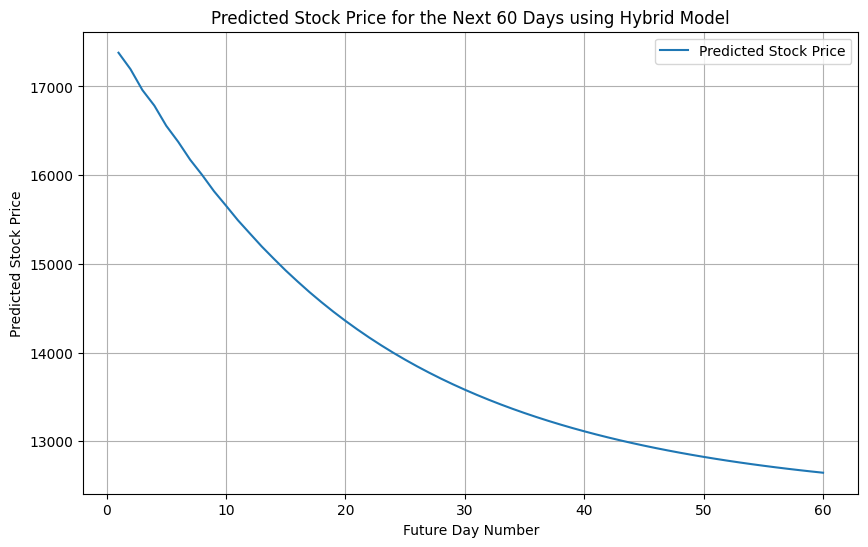

In [328]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_days+1), predictions, label='Predicted Stock Price')
plt.title('Predicted Stock Price for the Next 60 Days using Hybrid Model')
plt.xlabel('Future Day Number')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [329]:
from kerastuner import HyperModel
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

class HybridHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()

        # LSTM layer
        model.add(LSTM(units=hp.Int('lstm_units_1', min_value=30, max_value=60, step=10),
                       return_sequences=True, input_shape=self.input_shape))

        # GRU layer
        model.add(GRU(units=hp.Int('gru_units', min_value=30, max_value=60, step=10),
                      return_sequences=False))

        # Dense layer
        model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=40, step=10), activation='relu'))

        # Output layer
        model.add(Dense(units=1))

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        return model


In [330]:
from kerastuner.tuners import RandomSearch

input_shape = (x_train.shape[1], 1)
hypermodel = HybridHyperModel(input_shape)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='random_search',
    project_name='hybrid_model'
)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


In [331]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hyperparameters.values)


{'lstm_units_1': 50, 'gru_units': 30, 'dense_units': 30}


## Analysis with real world stock market data (60 days) vs (predicted data for 60 days)

In [332]:
import pandas as pd

# Loading the provided real data again
real_data = pd.read_csv('60 DAYS REAL STOCK PRICE.csv')
real_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
1,2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2,2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
3,2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
4,2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200


In [333]:
real_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
55,2023-03-22,17177.449219,17207.250000,17107.849609,17151.900391,17151.900391,0
56,2023-03-23,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200
57,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000
58,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400
59,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800


In [334]:
lstm_predictions = [
    17851.955078125, 17680.404296875, 17491.3515625, 17304.328125, 17128.845703125,
    16969.455078125, 16827.552734375, 16702.337890625, 16591.63671875, 16492.599609375,
    16402.240234375, 16317.8125, 16237.048828125, 16158.2431640625, 16080.2646484375,
    16002.4853515625, 15924.6787109375, 15846.9091796875, 15769.412109375, 15692.5087890625,
    15616.5263671875, 15541.75390625, 15468.41015625, 15396.640625, 15326.51171875,
    15258.02734375, 15191.1435546875, 15125.7841796875, 15061.857421875, 14999.2626953125,
    14937.908203125, 14877.708984375, 14818.5927734375, 14760.5029296875, 14703.3955078125,
    14647.232421875, 14591.98828125, 14537.642578125, 14484.17578125, 14431.572265625,
    14379.8173828125, 14328.89453125, 14278.7841796875, 14229.4716796875, 14180.9375,
    14133.1611328125, 14086.125, 14039.8115234375, 13994.197265625, 13949.267578125,
    13905.001953125, 13861.38671875, 13818.40234375, 13776.037109375, 13734.2724609375,
    13693.0966796875, 13652.4951171875, 13612.4541015625, 13572.962890625, 13534.0078125
]

gru_predictions = [
    17727.587890625,
    17313.306640625,
    16935.751953125,
    16581.71875,
    16247.119140625,
    15929.8974609375,
    15628.498046875,
    15341.544921875,
    15067.7939453125,
    14806.119140625,
    14555.5087890625,
    14315.0556640625,
    14083.9482421875,
    13861.4619140625,
    13646.94921875,
    13439.82421875,
    13239.564453125,
    13045.6943359375,
    12857.7890625,
    12675.4580078125,
    12498.3515625,
    12326.150390625,
    12158.560546875,
    11995.3154296875,
    11836.16796875,
    11680.89453125,
    11529.28515625,
    11381.15234375,
    11236.3173828125,
    11094.6162109375,
    10955.8974609375,
    10820.0224609375,
    10686.8583984375,
    10556.28515625,
    10428.1884765625,
    10302.462890625,
    10179.009765625,
    10057.736328125,
    9938.5576171875,
    9821.390625,
    9706.1591796875,
    9592.7919921875,
    9481.22265625,
    9371.388671875,
    9263.228515625,
    9156.6875,
    9051.7119140625,
    8948.251953125,
    8846.259765625,
    8745.6923828125,
    8646.505859375,
    8548.662109375,
    8452.123046875,
    8356.8515625,
    8262.814453125,
    8169.978515625,
    8078.31396484375,
    7987.7919921875,
    7898.38427734375,
    7810.064453125
]

hybrid_model_predictions = [
    17581.322265625,
    17423.900390625,
    17236.251953125,
    17081.3515625,
    16917.306640625,
    16766.619140625,
    16611.8984375,
    16468.42578125,
    16325.8046875,
    16187.822265625,
    16052.3837890625,
    15921.529296875,
    15793.26171875,
    15668.7900390625,
    15547.26953125,
    15429.0341796875,
    15313.7822265625,
    15201.6650390625,
    15091.9931640625,
    14985.3037109375,
    14880.7353515625,
    14779.2138671875,
    14679.5126953125,
    14582.90625,
    14487.55078125,
    14395.1904296875,
    14303.814453125,
    14215.6025390625,
    14127.6337890625,
    14042.7744140625,
    13958.044921875,
    13876.138671875,
    13794.3095703125,
    13714.9833984375,
    13635.408203125,
    13558.263671875,
    13481.1015625,
    13406.072265625,
    13330.9658203125,
    13257.6884765625,
    13184.4287109375,
    13112.8525390625,
    13041.3115234375,
    12971.1796875,
    12900.9482421875,
    12832.1826171875,
    12763.6357421875,
    12696.2314453125,
    12629.0146484375,
    12562.7587890625,
    12496.669921875,
    12431.6533203125,
    12366.9228515625,
    12303.0029296875,
    12239.435546875,
    12176.6875,
    12114.203125,
    12052.412109375,
    11991.0625,
    11930.2529296875
]


In [335]:
# Extracting the real values from the loaded CSV
real_values = real_data["Close"].values


In [336]:
# Checking the lengths of the lists/arrays
print("Length of real_values:", len(real_values))
print("Length of lstm_predictions:", len(lstm_predictions))
print("Length of gru_predictions:", len(gru_predictions))
print("Length of hybrid_model_predictions:", len(hybrid_model_predictions))


Length of real_values: 60
Length of lstm_predictions: 60
Length of gru_predictions: 60
Length of hybrid_model_predictions: 60


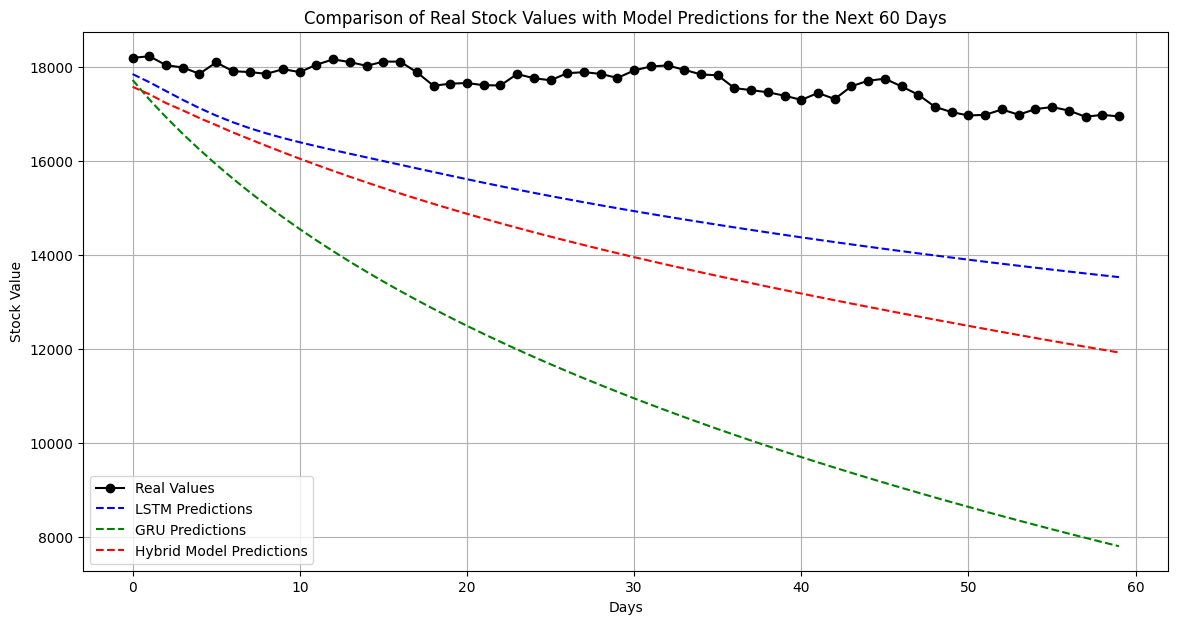

In [337]:

# Plotting the real values and the predicted values from the three models
plt.figure(figsize=(14, 7))
plt.plot(real_values, label="Real Values", color='black', marker='o')
plt.plot(lstm_predictions, label="LSTM Predictions", linestyle="--", color='blue')
plt.plot(gru_predictions, label="GRU Predictions", linestyle="--", color='green')
plt.plot(hybrid_model_predictions, label="Hybrid Model Predictions", linestyle="--", color='red')
plt.title("Comparison of Real Stock Values with Model Predictions for the Next 60 Days")
plt.xlabel("Days")
plt.ylabel("Stock Value")
plt.legend()
plt.grid(True)
plt.show()

In [338]:
lstm_predictions_for_first_10_days= [17851.955078125, 17680.404296875, 17491.3515625, 17304.328125, 17128.845703125,
    16969.455078125, 16827.552734375, 16702.337890625, 16591.63671875, 16492.599609375]
gru_predictions_for_first_10_days =[17727.587890625,
    17313.306640625,
    16935.751953125,
    16581.71875,
    16247.119140625,
    15929.8974609375,
    15628.498046875,
    15341.544921875,
    15067.7939453125,
    14806.119140625]
hybrid_model_predictions_for_first_10_days =[17581.322265625,
    17423.900390625,
    17236.251953125,
    17081.3515625,
    16917.306640625,
    16766.619140625,
    16611.8984375,
    16468.42578125,
    16325.8046875,
    16187.822265625]



In [339]:
real_values_for_first_10_days=real_data["Close"].values[:10]

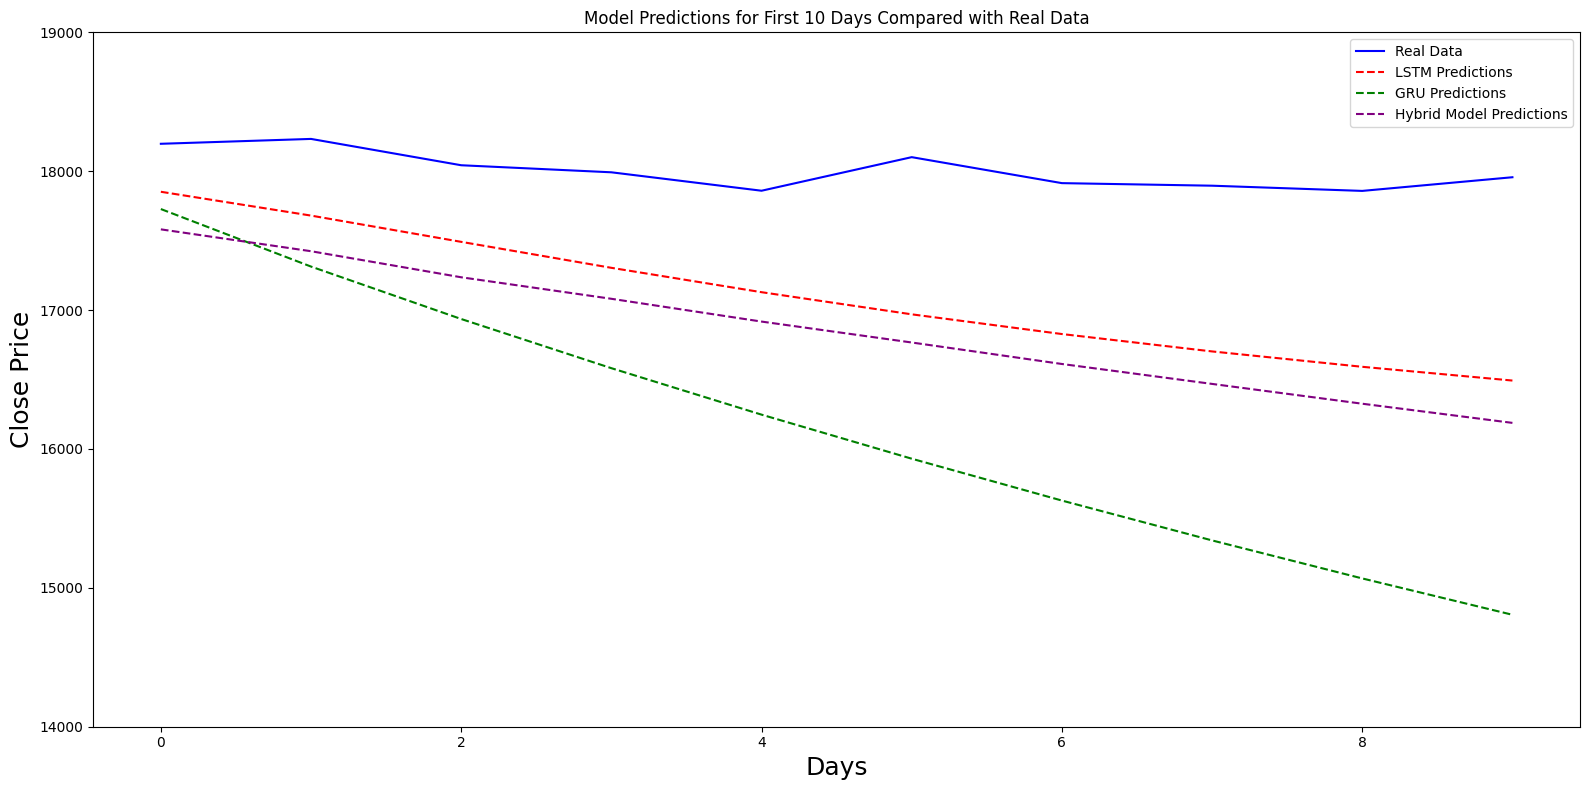

In [340]:


# Plotting
plt.figure(figsize=(16,8))
plt.title('Model Predictions for First 10 Days Compared with Real Data')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.ylim([14000, 19000])  # Setting y-axis limits

# Plotting the real data and predictions
plt.plot(real_values_for_first_10_days, color='blue', label='Real Data')
plt.plot(lstm_predictions_for_first_10_days, color='red', linestyle='dashed', label='LSTM Predictions')
plt.plot(gru_predictions_for_first_10_days, color='green', linestyle='dashed', label='GRU Predictions')
plt.plot(hybrid_model_predictions_for_first_10_days, color='purple', linestyle='dashed', label='Hybrid Model Predictions')

# Display the legend
plt.legend()
plt.tight_layout()
plt.show()


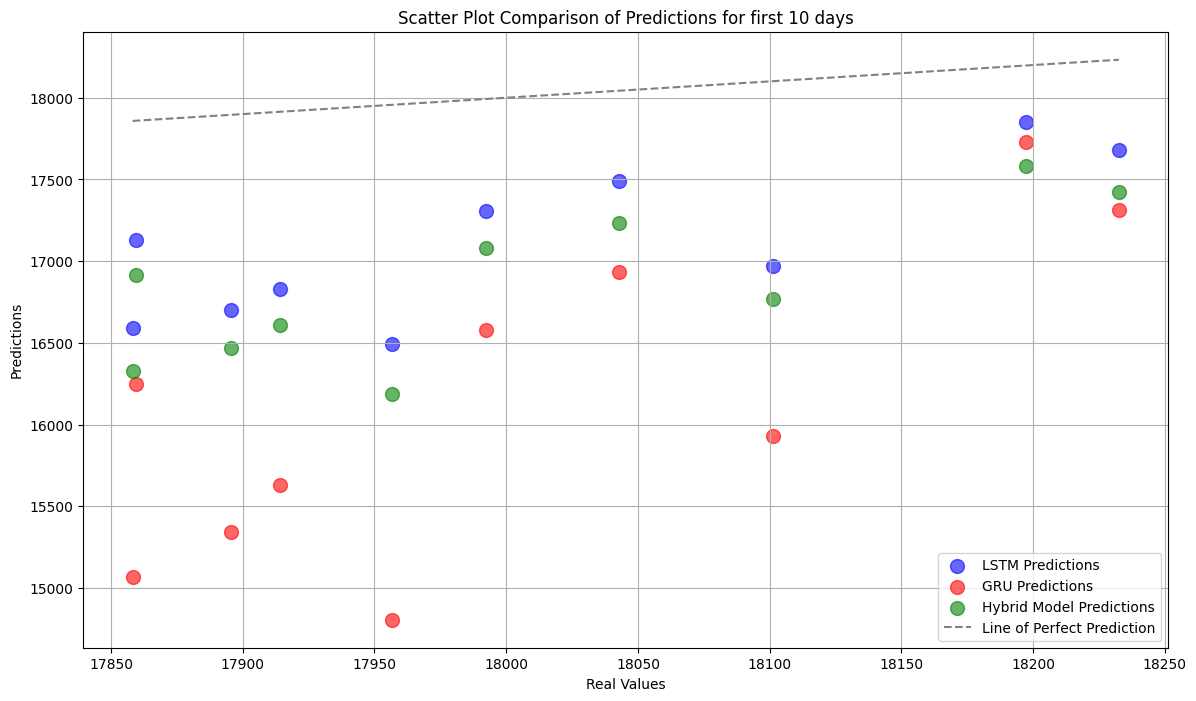

In [341]:
# Creating scatter plots again
plt.figure(figsize=(14, 8))

# Scatter plot for LSTM predictions
plt.scatter(real_values_for_first_10_days, lstm_predictions_for_first_10_days, color='blue', label='LSTM Predictions', alpha=0.6, s=100)

# Scatter plot for GRU predictions
plt.scatter(real_values_for_first_10_days, gru_predictions_for_first_10_days, color='red', label='GRU Predictions', alpha=0.6, s=100)

# Scatter plot for Hybrid model predictions
plt.scatter(real_values_for_first_10_days, hybrid_model_predictions_for_first_10_days, color='green', label='Hybrid Model Predictions', alpha=0.6, s=100)

# Plotting the line of perfect prediction (y=x line) and adding its label
plt.plot([min(real_values_for_first_10_days), max(real_values_for_first_10_days)],
         [min(real_values_for_first_10_days), max(real_values_for_first_10_days)], color='gray', linestyle='--', label='Line of Perfect Prediction')

# Adding labels, title, and legend
plt.title('Scatter Plot Comparison of Predictions for first 10 days')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


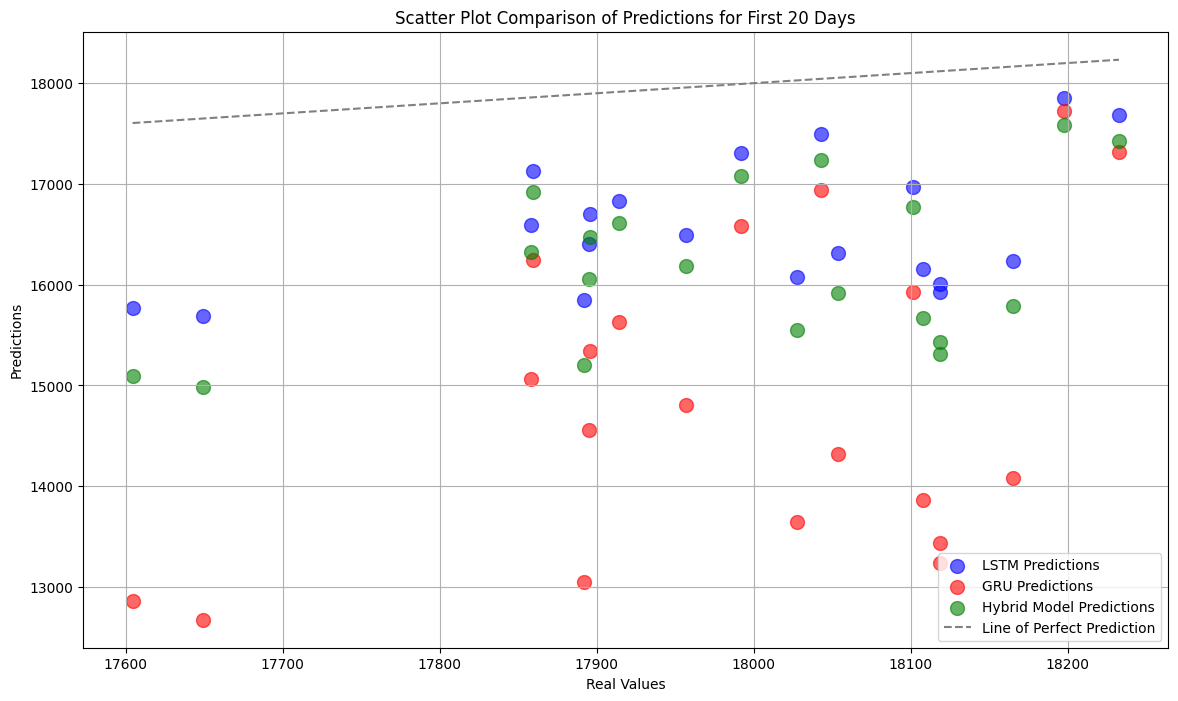

In [342]:
import matplotlib.pyplot as plt

# Extracting the first 20 days of real values and predictions
real_values_20 = real_values[:20]
lstm_predictions_20 = lstm_predictions[:20]
gru_predictions_20 = gru_predictions[:20]
hybrid_model_predictions_20 = hybrid_model_predictions[:20]

# Setting up the plotting
plt.figure(figsize=(14, 8))

# Scatter plot for LSTM predictions
plt.scatter(real_values_20, lstm_predictions_20, color='blue', label='LSTM Predictions', alpha=0.6, s=100)

# Scatter plot for GRU predictions
plt.scatter(real_values_20, gru_predictions_20, color='red', label='GRU Predictions', alpha=0.6, s=100)

# Scatter plot for Hybrid model predictions
plt.scatter(real_values_20, hybrid_model_predictions_20, color='green', label='Hybrid Model Predictions', alpha=0.6, s=100)

# Plotting the line of perfect prediction (y=x line) and adding its label
plt.plot([min(real_values_20), max(real_values_20)],
         [min(real_values_20), max(real_values_20)], color='gray', linestyle='--', label='Line of Perfect Prediction')

# Adding labels, title, and legend
plt.title('Scatter Plot Comparison of Predictions for First 20 Days')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


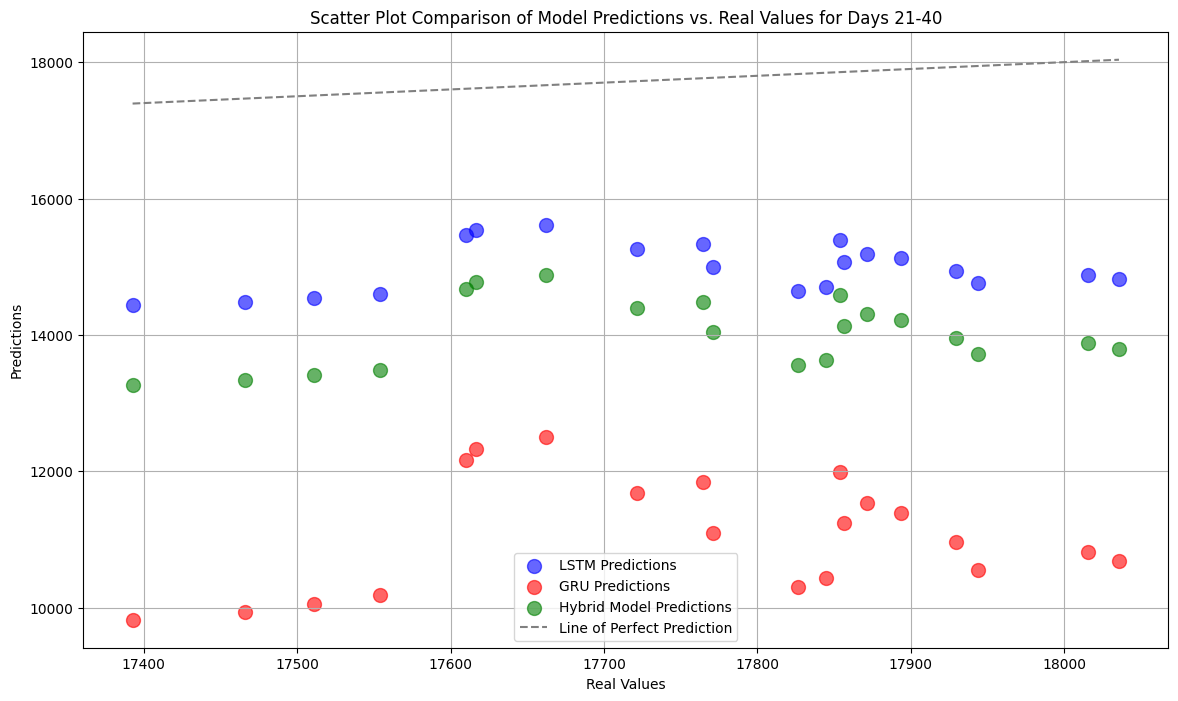

In [343]:
# Extracting the middle 20 days of real values and predictions
real_values_middle_20 = real_values[20:40]
lstm_predictions_middle_20 = lstm_predictions[20:40]
gru_predictions_middle_20 = gru_predictions[20:40]
hybrid_model_predictions_middle_20 = hybrid_model_predictions[20:40]

# Setting up the plotting
plt.figure(figsize=(14, 8))

# Scatter plot for LSTM predictions
plt.scatter(real_values_middle_20, lstm_predictions_middle_20, color='blue', label='LSTM Predictions', alpha=0.6, s=100)

# Scatter plot for GRU predictions
plt.scatter(real_values_middle_20, gru_predictions_middle_20, color='red', label='GRU Predictions', alpha=0.6, s=100)

# Scatter plot for Hybrid model predictions
plt.scatter(real_values_middle_20, hybrid_model_predictions_middle_20, color='green', label='Hybrid Model Predictions', alpha=0.6, s=100)

# Plotting the line of perfect prediction (y=x line) and adding its label
plt.plot([min(real_values_middle_20), max(real_values_middle_20)],
         [min(real_values_middle_20), max(real_values_middle_20)], color='gray', linestyle='--', label='Line of Perfect Prediction')

# Adding labels, title, and legend
plt.title('Scatter Plot Comparison of Model Predictions vs. Real Values for Days 21-40')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


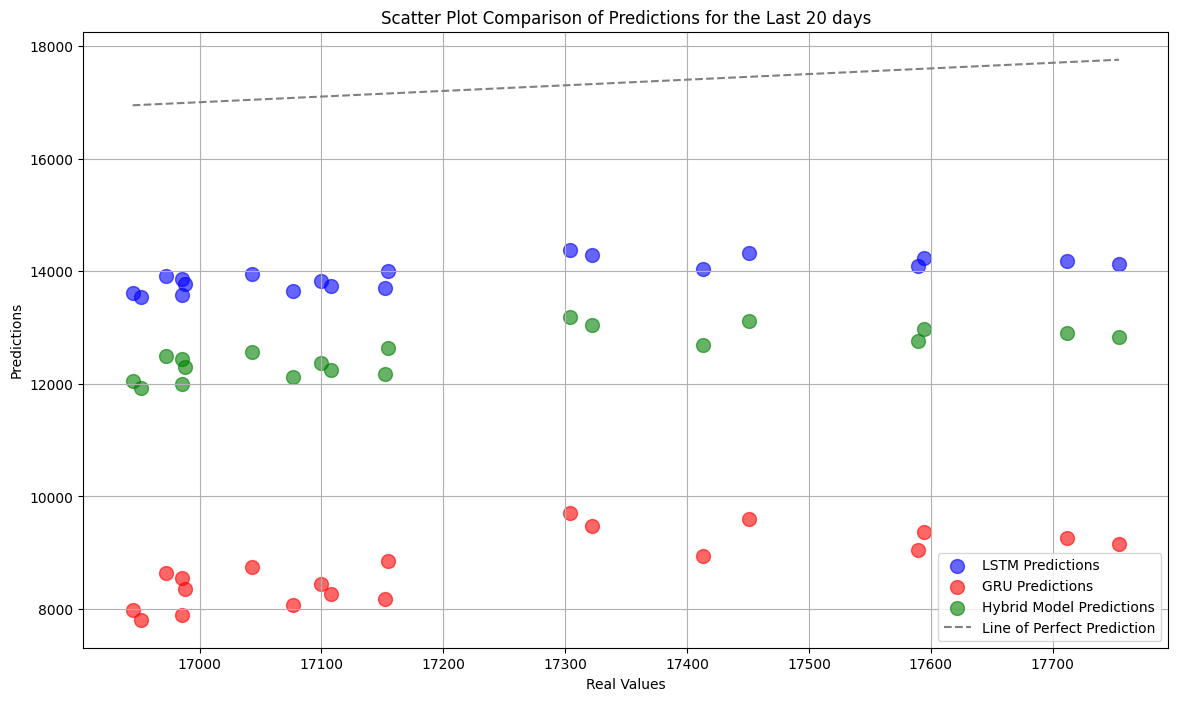

In [344]:
# Extracting the last 20 days of data from the provided lists
last_20_real_values = real_values[-20:]
last_20_lstm_predictions = lstm_predictions[-20:]
last_20_gru_predictions = gru_predictions[-20:]
last_20_hybrid_model_predictions = hybrid_model_predictions[-20:]

# Plotting scatter plots for the last 20 days
plt.figure(figsize=(14, 8))

# Scatter plot for LSTM predictions
plt.scatter(last_20_real_values, last_20_lstm_predictions, color='blue', label='LSTM Predictions', alpha=0.6, s=100)

# Scatter plot for GRU predictions
plt.scatter(last_20_real_values, last_20_gru_predictions, color='red', label='GRU Predictions', alpha=0.6, s=100)

# Scatter plot for Hybrid model predictions
plt.scatter(last_20_real_values, last_20_hybrid_model_predictions, color='green', label='Hybrid Model Predictions', alpha=0.6, s=100)

# Plotting the line of perfect prediction (y=x line)
plt.plot([min(last_20_real_values), max(last_20_real_values)],
         [min(last_20_real_values), max(last_20_real_values)], color='gray', linestyle='--', label='Line of Perfect Prediction')

# Adding labels, title, and legend
plt.title('Scatter Plot Comparison of Predictions for the Last 20 days')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


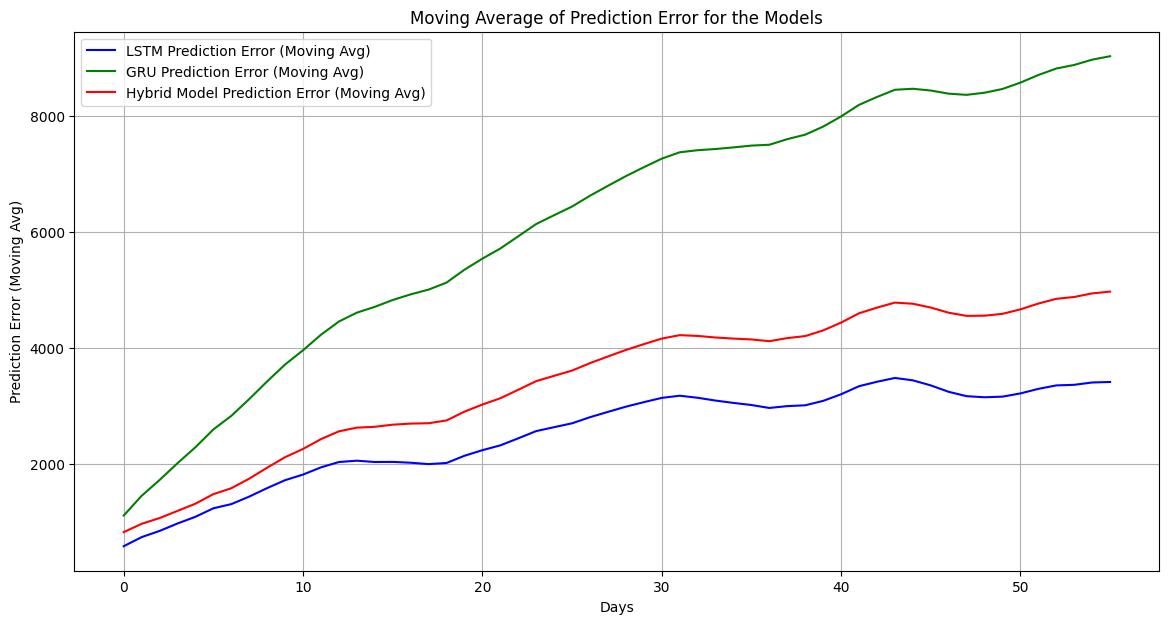

In [345]:
# Calculating the moving average of the prediction error for each model

# Error for each model
lstm_error = real_values - lstm_predictions
gru_error = real_values - gru_predictions
hybrid_model_error = real_values - hybrid_model_predictions

# Calculate moving average of errors using a window size, say 5
window_size = 5
lstm_error_moving_avg = np.convolve(lstm_error, np.ones(window_size)/window_size, mode='valid')
gru_error_moving_avg = np.convolve(gru_error, np.ones(window_size)/window_size, mode='valid')
hybrid_model_error_moving_avg = np.convolve(hybrid_model_error, np.ones(window_size)/window_size, mode='valid')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(lstm_error_moving_avg, label="LSTM Prediction Error (Moving Avg)", color='blue')
plt.plot(gru_error_moving_avg, label="GRU Prediction Error (Moving Avg)", color='green')
plt.plot(hybrid_model_error_moving_avg, label="Hybrid Model Prediction Error (Moving Avg)", color='red')
plt.title("Moving Average of Prediction Error for the Models")
plt.xlabel("Days")
plt.ylabel("Prediction Error (Moving Avg)")
plt.legend()
plt.grid(True)
plt.show()
